## Bike Sharing Case Study using Linear Regression

**Problem Statement**
***Market Information***: 
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.***Company Information***: 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Specifically, they want to understand the **factors affecting the demand for these shared bikes in the American market**. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

**Business Goal**:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to 
 - understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
 - Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Importing the libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# For Linear Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option("display.max_columns",None)

## Reading the data

In [9]:
#Importing the dataset
bikedf = pd.read_csv(r"C:\Users\Niharika\Downloads\day_bike_case_study.csv")
bikedf.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   
5        6  06-01-2018       1   0     1        0        6           0   
6        7  07-01-2018       1   0     1        0        0           0   
7        8  08-01-2018       1   0     1        0        1           1   
8        9  09-01-2018       1   0     1        0        2           1   
9       10  10-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
5           1   8.378268  11.66045  51.8261   6.000868      88        1518   
6           2   8.057402  10.44195  49.8696  11.304642     148        1362   
7           2   6.765000   8.11270  53.5833  17.875868      68         891   
8           1   5.671653   5.80875  43.4167  24.250650      54         768   
9           1   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

## Column Dictionary

day_bike_case_study.csv has the following fields:
 - instant: record index
 - dteday : date
 - season : season (1:spring, 2:summer, 3:fall, 4:winter)
 - yr : year (0: 2018, 1:2019)
 - mnth : month (1 to 12)
 - holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
 - weekday : day of the week
 - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
 - weathersit : 
	 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - temp : temperature in Celsius
 - atemp: feeling temperature in Celsius
 - hum: humidity
 - windspeed: wind speed
 - casual: count of casual users
 - registered: count of registered users
 - cnt: count of total rental bikes including both casual and registered

## Initial Examination of Data

In [13]:
# Shape of the dataframe
bikedf.shape

(730, 16)

In [14]:
# Info about columns, dtypes 
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<HTML>
<MARK><B>Actions required</B></MARK>
</HTML>

1. Convert dteday to date-time function
2. Drop instant column
3. Perform scaling for following 7 columns:temp, atemp, hum, windspeed,	casual,	registered,	cnt
4. Variables corporate can take actions on: season, yr, mnth, holiday, weekday, workingday, causual, registered, cnt

In [16]:
# Enabling display of float values upto 2 decimal points
pd.options.display.float_format="{:,.2f}".format

In [17]:
# Describing the data
bikedf.describe()

instant  season     yr   mnth  holiday  weekday  workingday  \
count   730.00  730.00 730.00 730.00   730.00   730.00      730.00   
mean    365.50    2.50   0.50   6.53     0.03     3.00        0.69   
std     210.88    1.11   0.50   3.45     0.17     2.00        0.46   
min       1.00    1.00   0.00   1.00     0.00     0.00        0.00   
25%     183.25    2.00   0.00   4.00     0.00     1.00        0.00   
50%     365.50    3.00   0.50   7.00     0.00     3.00        1.00   
75%     547.75    3.00   1.00  10.00     0.00     5.00        1.00   
max     730.00    4.00   1.00  12.00     1.00     6.00        1.00   

       weathersit   temp  atemp    hum  windspeed   casual  registered  \
count      730.00 730.00 730.00 730.00     730.00   730.00      730.00   
mean         1.39  20.32  23.73  62.77      12.76   849.25    3,658.76   
std          0.54   7.51   8.15  14.24       5.20   686.48    1,559.76   
min          1.00   2.42   3.95   0.00       1.50     2.00       20.00   
25%          1.00  13.81  16.89  52.00       9.04   316.25    2,502.25   
50%          1.00  20.47  24.37  62.62      12.13   717.00    3,664.50   
75%          2.00  26.88  30.45  72.99      15.63 1,096.50    4,783.25   
max          3.00  35.33  42.04  97.25      34.00 3,410.00    6,946.00   

           cnt  
count   730.00  
mean  4,508.01  
std   1,936.01  
min      22.00  
25%   3,169.75  
50%   4,548.50  
75%   5,966.00  
max   8,714.00

<Html><mark>Mean values for most variables, except 'casual'(count of casual customers) are placed close to the median values which are increasing gradually towards max values. This indicates that there are no outliers in the data except in the 'casual' column.</mark></Html>

In [19]:
# Droppping instant column as we already have an in-built index for the data
bikedf=bikedf.iloc[:,1:]

bikedf.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        1           1           2   
1  02-01-2018       1   0     1        0        2           1           2   
2  03-01-2018       1   0     1        0        3           1           1   
3  04-01-2018       1   0     1        0        4           1           1   
4  05-01-2018       1   0     1        0        5           1           1   

   temp  atemp   hum  windspeed  casual  registered   cnt  
0 14.11  18.18 80.58      10.75     331         654   985  
1 14.90  17.69 69.61      16.65     131         670   801  
2  8.05   9.47 43.73      16.64     120        1229  1349  
3  8.20  10.61 59.04      10.74     108        1454  1562  
4  9.31  11.46 43.70      12.52      82        1518  1600

<Html><mark>instant column dropped from the dataset.</mark></Html>

In [21]:
# Dropping 'Casual' and 'Registered' columns as they are directly derived from the target variable 'Cnt'. Keeping the columns will lead to data leakage.
bikedf=bikedf.drop(['casual','registered'], axis=1)
bikedf.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        1           1           2   
1  02-01-2018       1   0     1        0        2           1           2   
2  03-01-2018       1   0     1        0        3           1           1   
3  04-01-2018       1   0     1        0        4           1           1   
4  05-01-2018       1   0     1        0        5           1           1   

   temp  atemp   hum  windspeed   cnt  
0 14.11  18.18 80.58      10.75   985  
1 14.90  17.69 69.61      16.65   801  
2  8.05   9.47 43.73      16.64  1349  
3  8.20  10.61 59.04      10.74  1562  
4  9.31  11.46 43.70      12.52  1600

<Html><mark>casual and registered columns dropped from the dataset.</mark></Html>

## Cleaning the data

In [24]:
# Checking Null values
bikedf.isnull().sum()*100/bikedf.shape[0]

dteday       0.00
season       0.00
yr           0.00
mnth         0.00
holiday      0.00
weekday      0.00
workingday   0.00
weathersit   0.00
temp         0.00
atemp        0.00
hum          0.00
windspeed    0.00
cnt          0.00
dtype: float64

<Html><mark>There are no NULL values in the dataset, hence it is clean.</mark></Html>

In [26]:
# Remove duplicates (if any are present in the dataset)
bikedf.drop_duplicates(inplace = True)
bikedf.shape

(730, 13)

<Html><mark>There are no duplicate values in the dataset.</mark></Html>

### Aligning Data with Data Dictionary

In [29]:
# Checking value counts of 'season' column
bikedf['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [30]:
# Replacing the numerical values in the 'season' column with appropriate category names as per data dictionary
bikedf['season']=bikedf['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikedf.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018  spring   0     1        0        1           1           2   
1  02-01-2018  spring   0     1        0        2           1           2   
2  03-01-2018  spring   0     1        0        3           1           1   
3  04-01-2018  spring   0     1        0        4           1           1   
4  05-01-2018  spring   0     1        0        5           1           1   

   temp  atemp   hum  windspeed   cnt  
0 14.11  18.18 80.58      10.75   985  
1 14.90  17.69 69.61      16.65   801  
2  8.05   9.47 43.73      16.64  1349  
3  8.20  10.61 59.04      10.74  1562  
4  9.31  11.46 43.70      12.52  1600

In [31]:
# Rechecking value counts of 'season' column
bikedf['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [32]:
# Checking value counts of 'yr' column
bikedf['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [33]:
# Replacing the numerical values in the 'yr' column with appropriate category names as per data dictionary
bikedf['yr']=bikedf['yr'].map({0: '2018', 1:'2019'})
bikedf.head()

dteday  season    yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018  spring  2018     1        0        1           1           2   
1  02-01-2018  spring  2018     1        0        2           1           2   
2  03-01-2018  spring  2018     1        0        3           1           1   
3  04-01-2018  spring  2018     1        0        4           1           1   
4  05-01-2018  spring  2018     1        0        5           1           1   

   temp  atemp   hum  windspeed   cnt  
0 14.11  18.18 80.58      10.75   985  
1 14.90  17.69 69.61      16.65   801  
2  8.05   9.47 43.73      16.64  1349  
3  8.20  10.61 59.04      10.74  1562  
4  9.31  11.46 43.70      12.52  1600

In [34]:
# Rechecking value counts of 'yr' column
bikedf['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [35]:
# Checking value counts of 'mnth' column
bikedf['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [36]:
# Replacing the numerical values in the 'mnth' column with appropriate category names as per data dictionary
bikedf['mnth']=bikedf['mnth'].map({1:'jan', 2:'feb', 3:'march', 4:'apr', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bikedf.head()

dteday  season    yr mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018  spring  2018  jan        0        1           1           2   
1  02-01-2018  spring  2018  jan        0        2           1           2   
2  03-01-2018  spring  2018  jan        0        3           1           1   
3  04-01-2018  spring  2018  jan        0        4           1           1   
4  05-01-2018  spring  2018  jan        0        5           1           1   

   temp  atemp   hum  windspeed   cnt  
0 14.11  18.18 80.58      10.75   985  
1 14.90  17.69 69.61      16.65   801  
2  8.05   9.47 43.73      16.64  1349  
3  8.20  10.61 59.04      10.74  1562  
4  9.31  11.46 43.70      12.52  1600

In [37]:
# Rechecking value counts of 'mnth' column
bikedf['mnth'].value_counts()

mnth
jan      62
march    62
may      62
july     62
aug      62
oct      62
dec      62
apr      60
june     60
sep      60
nov      60
feb      56
Name: count, dtype: int64

In [38]:
# Checking value counts of 'holiday' column
bikedf['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [39]:
# Replacing the numerical values in the 'holiday' column with appropriate category names as per data dictionary
bikedf['holiday']=bikedf['holiday'].map({0: 'no', 1:'yes'})
bikedf.head()

dteday  season    yr mnth holiday  weekday  workingday  weathersit  \
0  01-01-2018  spring  2018  jan      no        1           1           2   
1  02-01-2018  spring  2018  jan      no        2           1           2   
2  03-01-2018  spring  2018  jan      no        3           1           1   
3  04-01-2018  spring  2018  jan      no        4           1           1   
4  05-01-2018  spring  2018  jan      no        5           1           1   

   temp  atemp   hum  windspeed   cnt  
0 14.11  18.18 80.58      10.75   985  
1 14.90  17.69 69.61      16.65   801  
2  8.05   9.47 43.73      16.64  1349  
3  8.20  10.61 59.04      10.74  1562  
4  9.31  11.46 43.70      12.52  1600

In [40]:
# Rechecking value counts of 'holiday' column
bikedf['holiday'].value_counts()

holiday
no     709
yes     21
Name: count, dtype: int64

In [41]:
# Checking value counts of 'weathersit' column
bikedf['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [42]:
# Replacing the numerical values in the 'weathersit' column with appropriate category names as per data dictionary
bikedf['weathersit']=bikedf['weathersit'].map({1:'partly_cloudy_clear', 2:'misty_cloudy', 3:'light_snow_rain', 4:'heavy_snow_rain'})
bikedf.head()

dteday  season    yr mnth holiday  weekday  workingday  \
0  01-01-2018  spring  2018  jan      no        1           1   
1  02-01-2018  spring  2018  jan      no        2           1   
2  03-01-2018  spring  2018  jan      no        3           1   
3  04-01-2018  spring  2018  jan      no        4           1   
4  05-01-2018  spring  2018  jan      no        5           1   

            weathersit  temp  atemp   hum  windspeed   cnt  
0         misty_cloudy 14.11  18.18 80.58      10.75   985  
1         misty_cloudy 14.90  17.69 69.61      16.65   801  
2  partly_cloudy_clear  8.05   9.47 43.73      16.64  1349  
3  partly_cloudy_clear  8.20  10.61 59.04      10.74  1562  
4  partly_cloudy_clear  9.31  11.46 43.70      12.52  1600

In [43]:
# Rechecking value counts of 'weathersit' column
bikedf['weathersit'].value_counts()

weathersit
partly_cloudy_clear    463
misty_cloudy           246
light_snow_rain         21
Name: count, dtype: int64

In [44]:
# Checking value counts of 'weekday' column
bikedf['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [45]:
bikedf.head(7)

dteday  season    yr mnth holiday  weekday  workingday  \
0  01-01-2018  spring  2018  jan      no        1           1   
1  02-01-2018  spring  2018  jan      no        2           1   
2  03-01-2018  spring  2018  jan      no        3           1   
3  04-01-2018  spring  2018  jan      no        4           1   
4  05-01-2018  spring  2018  jan      no        5           1   
5  06-01-2018  spring  2018  jan      no        6           0   
6  07-01-2018  spring  2018  jan      no        0           0   

            weathersit  temp  atemp   hum  windspeed   cnt  
0         misty_cloudy 14.11  18.18 80.58      10.75   985  
1         misty_cloudy 14.90  17.69 69.61      16.65   801  
2  partly_cloudy_clear  8.05   9.47 43.73      16.64  1349  
3  partly_cloudy_clear  8.20  10.61 59.04      10.74  1562  
4  partly_cloudy_clear  9.31  11.46 43.70      12.52  1600  
5  partly_cloudy_clear  8.38  11.66 51.83       6.00  1606  
6         misty_cloudy  8.06  10.44 49.87      11.30  1510

In [46]:
# Replacing the numerical values in the 'weekday' column with appropriate category names as per data dictionary
bikedf['weekday']=bikedf['weekday'].map({1:'mon', 2:'tues', 3:'wed', 4:'thurs', 5:'fri', 6:'sat', 0:'sun'})
bikedf.head(7)

dteday  season    yr mnth holiday weekday  workingday  \
0  01-01-2018  spring  2018  jan      no     mon           1   
1  02-01-2018  spring  2018  jan      no    tues           1   
2  03-01-2018  spring  2018  jan      no     wed           1   
3  04-01-2018  spring  2018  jan      no   thurs           1   
4  05-01-2018  spring  2018  jan      no     fri           1   
5  06-01-2018  spring  2018  jan      no     sat           0   
6  07-01-2018  spring  2018  jan      no     sun           0   

            weathersit  temp  atemp   hum  windspeed   cnt  
0         misty_cloudy 14.11  18.18 80.58      10.75   985  
1         misty_cloudy 14.90  17.69 69.61      16.65   801  
2  partly_cloudy_clear  8.05   9.47 43.73      16.64  1349  
3  partly_cloudy_clear  8.20  10.61 59.04      10.74  1562  
4  partly_cloudy_clear  9.31  11.46 43.70      12.52  1600  
5  partly_cloudy_clear  8.38  11.66 51.83       6.00  1606  
6         misty_cloudy  8.06  10.44 49.87      11.30  1510

In [47]:
# Rechecking value counts of 'weekday' column
bikedf['weekday'].value_counts()

weekday
mon      105
tues     105
wed      104
thurs    104
fri      104
sat      104
sun      104
Name: count, dtype: int64

In [48]:
# Checking value counts of 'workingday' column
bikedf['workingday'].value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [49]:
# Replacing the numerical values in the 'workingday' column with appropriate category names as per data dictionary
bikedf['workingday']=bikedf['workingday'].map({0:'holiday', 1:'workday'})
bikedf.head()

dteday  season    yr mnth holiday weekday workingday  \
0  01-01-2018  spring  2018  jan      no     mon    workday   
1  02-01-2018  spring  2018  jan      no    tues    workday   
2  03-01-2018  spring  2018  jan      no     wed    workday   
3  04-01-2018  spring  2018  jan      no   thurs    workday   
4  05-01-2018  spring  2018  jan      no     fri    workday   

            weathersit  temp  atemp   hum  windspeed   cnt  
0         misty_cloudy 14.11  18.18 80.58      10.75   985  
1         misty_cloudy 14.90  17.69 69.61      16.65   801  
2  partly_cloudy_clear  8.05   9.47 43.73      16.64  1349  
3  partly_cloudy_clear  8.20  10.61 59.04      10.74  1562  
4  partly_cloudy_clear  9.31  11.46 43.70      12.52  1600

In [50]:
# Rechecking value counts of 'workingday' column
bikedf['workingday'].value_counts()

workingday
workday    504
holiday    226
Name: count, dtype: int64

In [51]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    object 
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    object 
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    object 
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 74.3+ KB


## Exploratory Data Analysis

### Univariate and Bivariate Analysis

### **1. cnt (Target variable)**

In [55]:
# Count of non-null values 
bikedf.cnt.describe()

count     730.00
mean    4,508.01
std     1,936.01
min        22.00
25%     3,169.75
50%     4,548.50
75%     5,966.00
max     8,714.00
Name: cnt, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'cnt' variable refers to the count of total rental bikes including both casual and registered.
 - There are no null values in the column.
 - The mean and median are relatively close to each other.

</div>

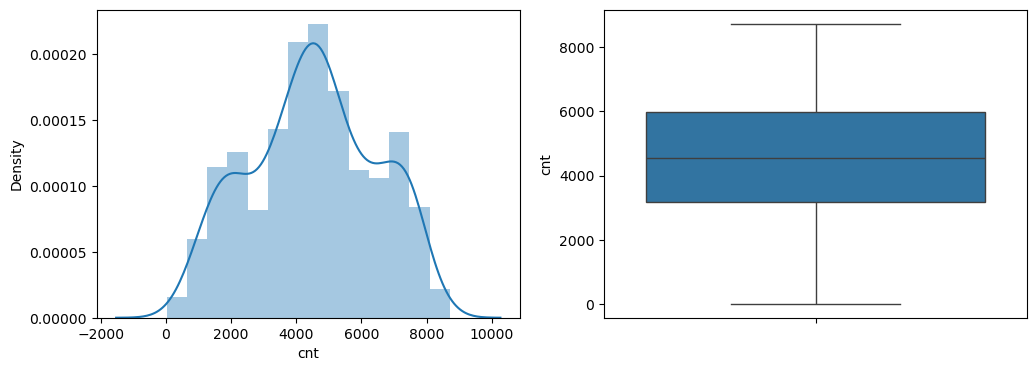

In [57]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(bikedf['cnt'])
plt.subplot(1,2,2)
sns.boxplot(bikedf['cnt'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The 'cnt' variable shows near normal distribution.
 - There are no outliers in the variable.

</div>

### Visualizing data

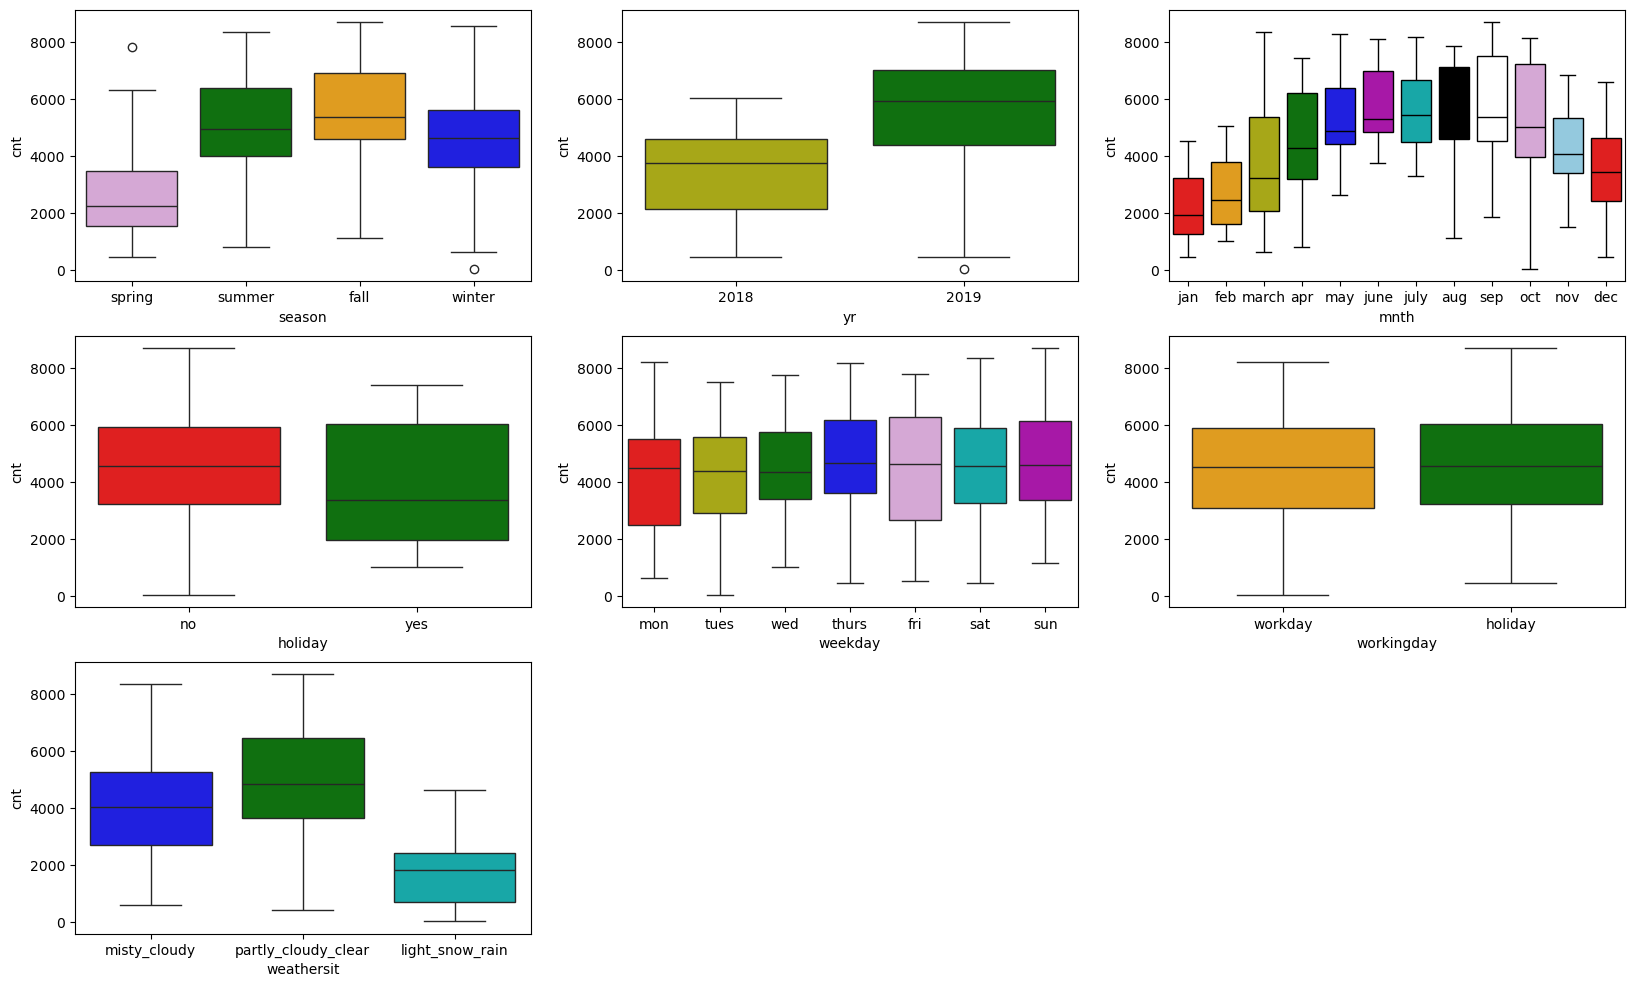

In [60]:
# Let's see how 'cnt' is related with other categorical variables using box plot
plt.figure(figsize = (20,12))
plt.subplot(3, 3, 1)
sns.boxplot(x = "season", y = "cnt", data = bikedf, palette=['plum', 'g', 'orange', 'b'])
plt.subplot(3, 3, 2)
sns.boxplot(x = "yr", y = "cnt", data = bikedf, palette=['y', 'g'])
plt.subplot(3, 3, 3)
sns.boxplot(x = "mnth", y = "cnt", data = bikedf, palette=['r', 'orange', 'y', 'g', 'b', 'm', 'c', 'k', 'w', 'plum','skyblue'])
plt.subplot(3, 3, 4)
sns.boxplot(x = "holiday", y = "cnt", data = bikedf, palette=['r', 'g'])
plt.subplot(3, 3, 5)
sns.boxplot(x = "weekday", y = "cnt", data = bikedf, palette=['r', 'y', 'g', 'b', 'plum', 'c', 'm'])
plt.subplot(3, 3, 6)
sns.boxplot(x = "workingday", y = "cnt", data = bikedf, palette=['orange', 'g'])
plt.subplot(3, 3, 7)
sns.boxplot(x = "weathersit", y = "cnt", data = bikedf, palette=['b', 'g', 'c'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - **Season**: The count of customers seems to be highest during the fall and summer season and lowest during the spring season.
 - **Year**: The number of customers was higher in 2019 as compared to 2018.
 - **Month**: The count of customer increased steadily from January to June, stabilized for a few months while peaking in September, then it dropped again in November and December.
 - **Holiday**: The count of customers seems to higher on days which were not holidays than those which were holidays.
 - **Weekday**: The count of customers was lower on Monday, Tuesday, Wednesday as compared to Thursday, Friday, Saturday and Sunday.
 - **Workingday**: The count of customers seems to be almost equal to both holidays and working days.
 - **Weather situation**: The count of customers is highest on clear/partly cloudy days and lowest on days with light rainy/snowy weather.

</div>

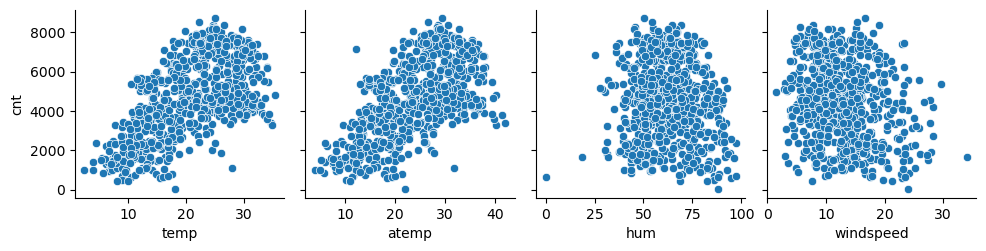

In [62]:
# Let's see how 'cnt' is related with other numerical variables using scatter plot
sns.pairplot(bikedf, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt', kind='scatter')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There seems to be positive correlation between the target variable and 'temp' variable.
 - There seems to be positive correlation between the target variable and 'atemp' variable.

</div>

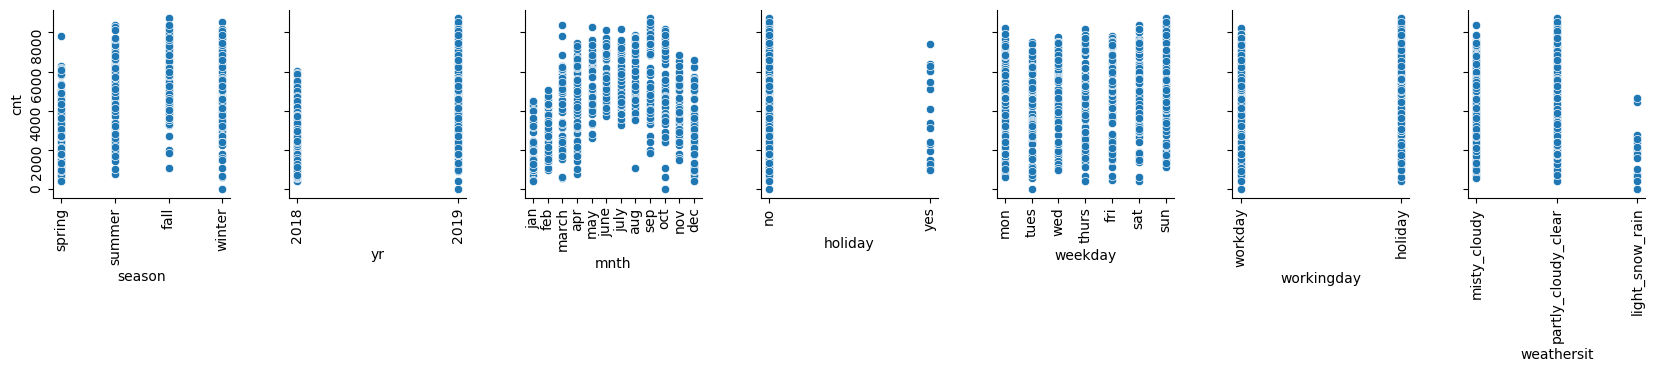

In [64]:
# Let's see how 'cnt' is related with other categorical variables using scatter plot
g=sns.pairplot(bikedf, x_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit'], y_vars='cnt', kind='scatter')
for ax in g.axes.flatten():
    ax.tick_params(rotation = 90)
plt.show()

<Html><mark>The count of total customers seems to be higher in summer/fall/winter season, year 2019, 5/6/7/9/10 months, 0/1/4/6 weekdays and during clear weather.</mark></Html>

### **2. Season**

In [67]:
# Count of non-null and unique values 
bikedf.season.describe()

count      730
unique       4
top       fall
freq       188
Name: season, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There are 4 unique values in the 'season' variable.
 - The most frequently occuring value is 'fall'.

</div>

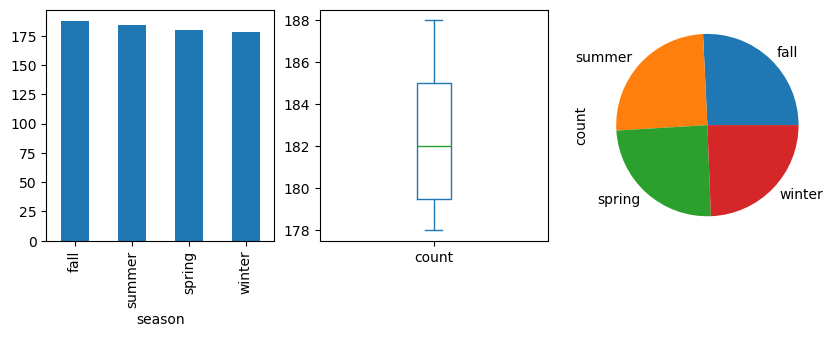

In [69]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
bikedf['season'].value_counts().plot.bar()
plt.subplot(1,3,2)
bikedf['season'].value_counts().plot.box()
plt.subplot(1,3,3)
bikedf['season'].value_counts().plot.pie()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'fall' shows the highest reprsentation in the variable while 'winter' shows the lowest.
 - There are no outliers in the variable.

</div>

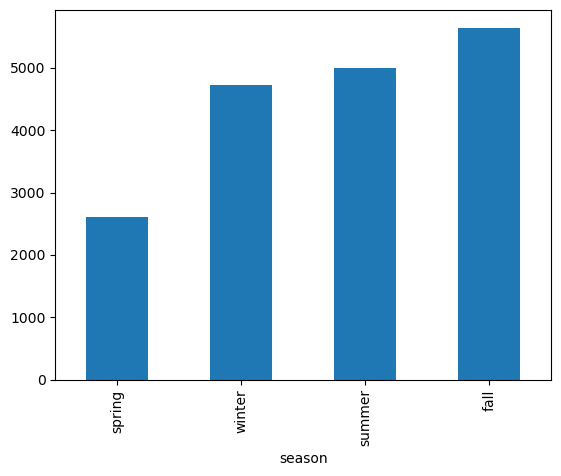

In [71]:
# Barplot of season vs. cnt
bikedf.groupby('season')['cnt'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Mean count of customers was highest in fall and lowest in spring season.

</div>

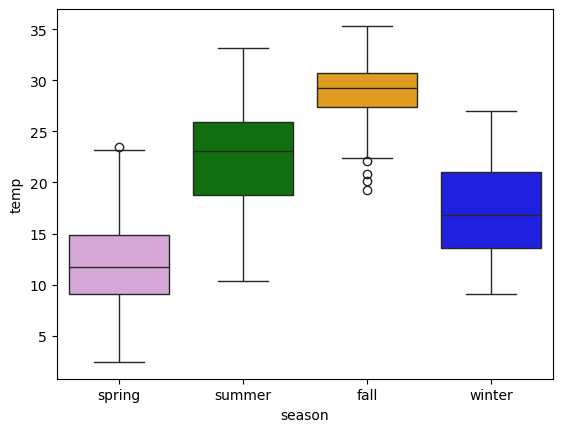

In [73]:
# Relation of season with temperature
sns.boxplot(x = "season", y = "temp", data = bikedf, palette=['plum', 'g', 'orange', 'b'])
plt.show()

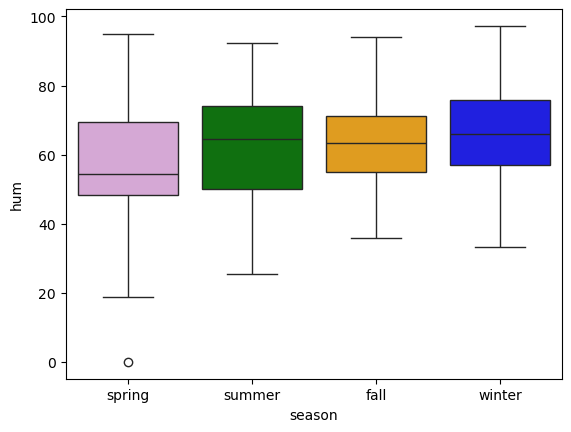

In [74]:
# Relation of season with humidity
sns.boxplot(x = "season", y = "hum", data = bikedf, palette=['plum', 'g', 'orange', 'b'])
plt.show()

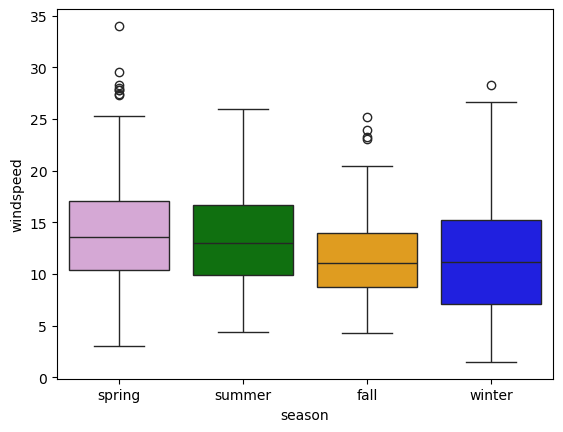

In [75]:
# Relation of season with windspeed
sns.boxplot(x = "season", y = "windspeed", data = bikedf, palette=['plum', 'g', 'orange', 'b'])
plt.show()

### **3. Year**

In [77]:
# Count of non-null and unique values 
bikedf.yr.value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There are 2 unique values in the 'yr' variable.
 - Both values are represented equally in the variable having 365 counts each.

</div>

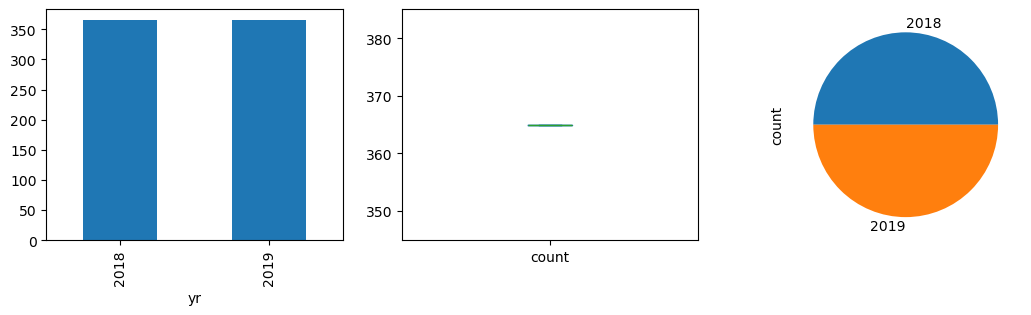

In [79]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (13,3))
plt.subplot(1,3,1)
bikedf['yr'].value_counts().plot.bar()
plt.subplot(1,3,2)
bikedf['yr'].value_counts().plot.box()
plt.subplot(1,3,3)
bikedf['yr'].value_counts().plot.pie()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Both '2018' and '2019' are equally representated in the variable.
 - There are no outliers in the variable.

</div>

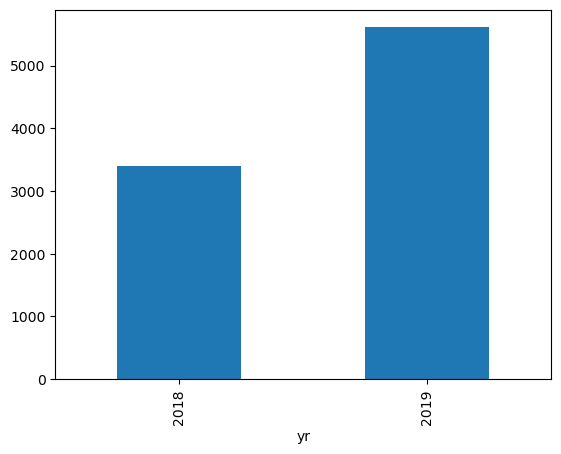

In [81]:
# Barplot of yr vs. cnt
bikedf.groupby('yr')['cnt'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Mean count of customers was higher in 2019 than 2018.

</div>

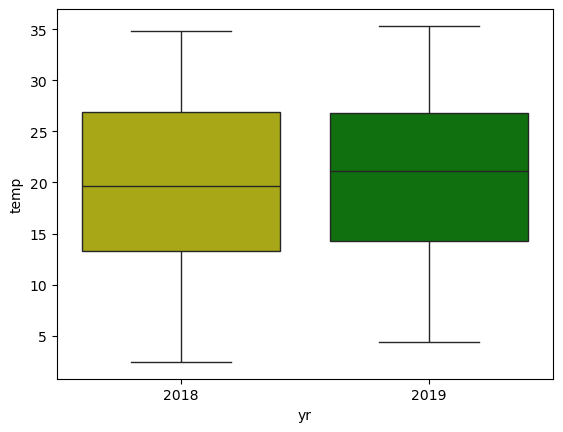

In [83]:
# Relation of yr with temperature
sns.boxplot(x = "yr", y = "temp", data = bikedf, palette=['y', 'g'])
plt.show()

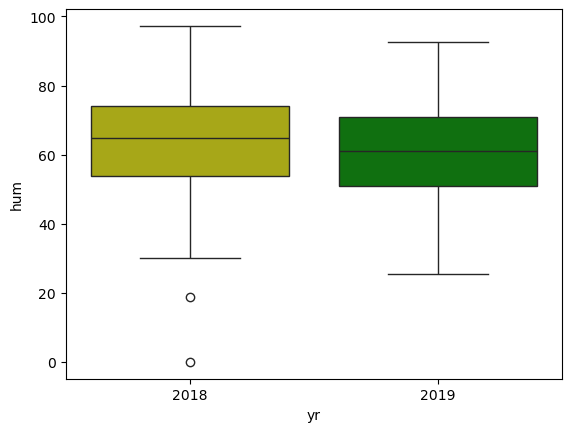

In [84]:
# Relation of year with humidity
sns.boxplot(x = "yr", y = "hum", data = bikedf, palette=['y', 'g'])
plt.show()

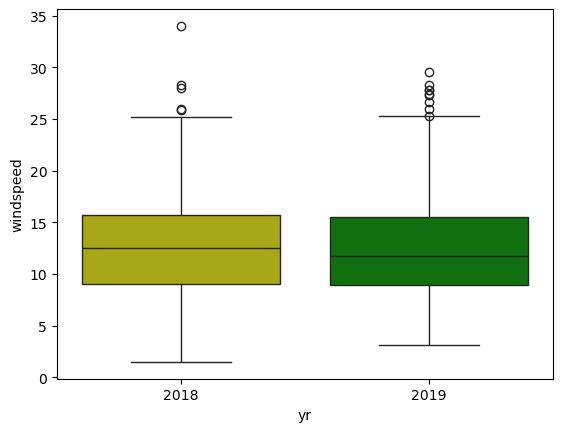

In [85]:
# Relation of year with windspeed
sns.boxplot(x = "yr", y = "windspeed", data = bikedf, palette=['y', 'g'])
plt.show()

### **4. Month**

In [87]:
# Count of non-null and unique values 
bikedf.mnth.describe()

count     730
unique     12
top       jan
freq       62
Name: mnth, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There are 12 unique values in the 'mnth' variable.
 - The most frequently occuring value is 'jan'.

</div>

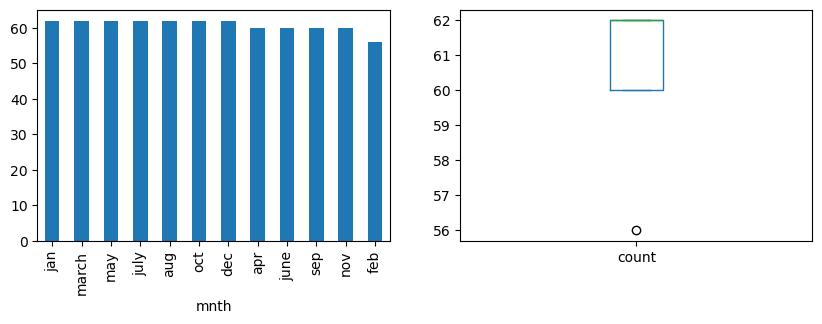

In [89]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
bikedf['mnth'].value_counts().plot.bar()
plt.subplot(1,2,2)
bikedf['mnth'].value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The months of 'jan','march','may','july,'aug','oct' and 'dec' show the highest representation while 'feb' shows the lowest.
 - As the month of 'feb' has the least number of days, it is appearing as an outlier in the variable.

</div>

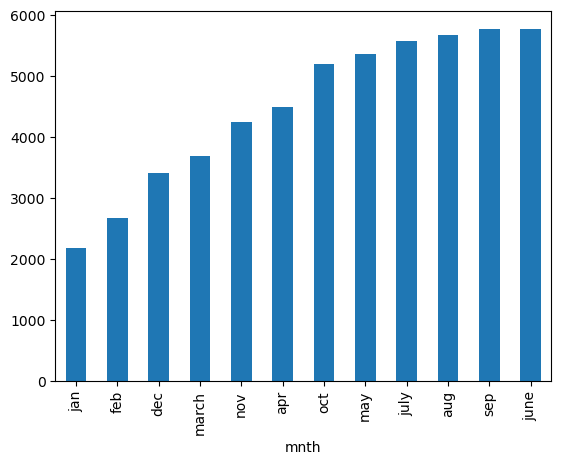

In [91]:
# Barplot of mnth vs. cnt
bikedf.groupby('mnth')['cnt'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Mean count of customers was highest in June, followed by September, August and July. It was lowest in January, followed by February and December.

</div>

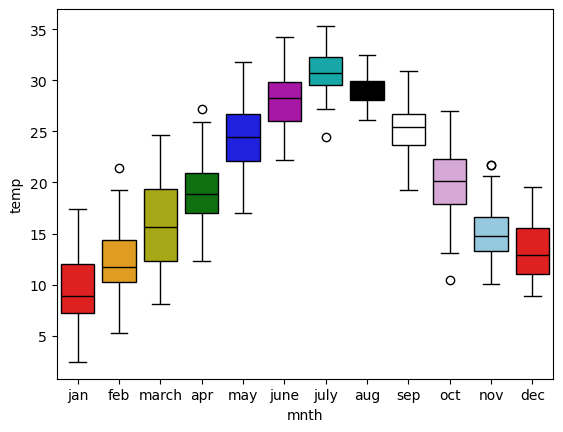

In [93]:
# Relation of mnth with temperature
sns.boxplot(x = "mnth", y = "temp", data = bikedf, palette=['r', 'orange', 'y', 'g', 'b', 'm', 'c', 'k', 'w', 'plum','skyblue'])
plt.show()

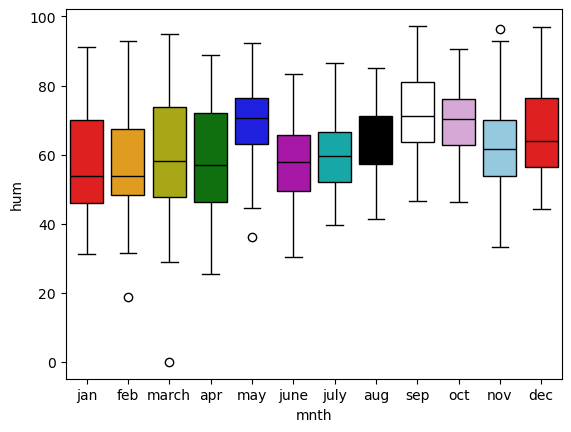

In [94]:
# Relation of mnth with humidity
sns.boxplot(x = "mnth", y = "hum", data = bikedf, palette=['r', 'orange', 'y', 'g', 'b', 'm', 'c', 'k', 'w', 'plum','skyblue'])
plt.show()

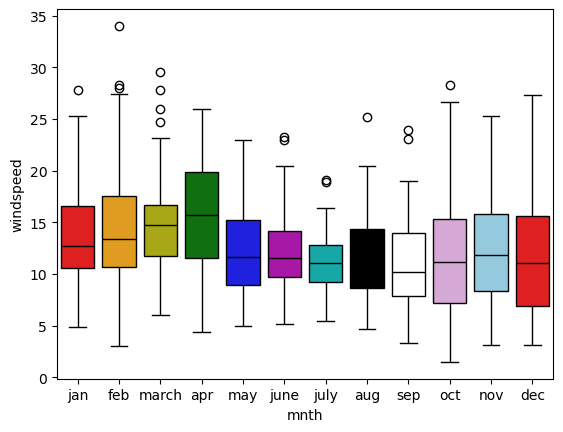

In [95]:
# Relation of mnth with windspeed
sns.boxplot(x = "mnth", y = "windspeed", data = bikedf, palette=['r', 'orange', 'y', 'g', 'b', 'm', 'c', 'k', 'w', 'plum','skyblue'])
plt.show()

### **5. Holiday**

In [97]:
# Count of non-null and unique values 
bikedf.holiday.describe()

count     730
unique      2
top        no
freq      709
Name: holiday, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There are 2 unique values in the 'holiday' variable.
 - The most frequently occuring value is 'no'.

</div>

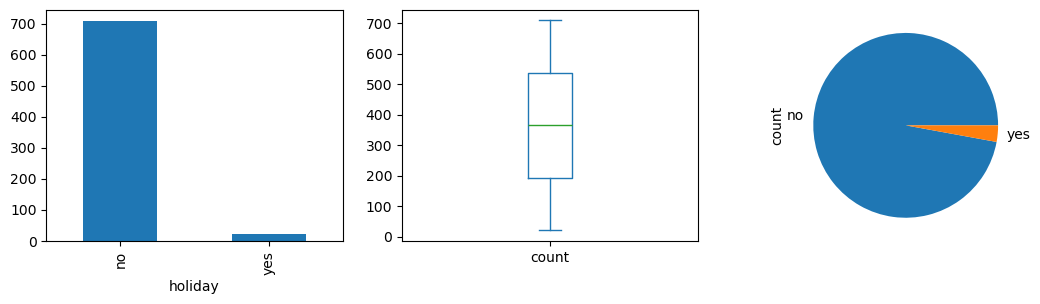

In [99]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (13,3))
plt.subplot(1,3,1)
bikedf['holiday'].value_counts().plot.bar()
plt.subplot(1,3,2)
bikedf['holiday'].value_counts().plot.box()
plt.subplot(1,3,3)
bikedf['holiday'].value_counts().plot.pie()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The days when there is 'no' holiday show the highest representation while days with 'yes' holiday show the lowest.
 - There are no outliers in the variable.

</div>

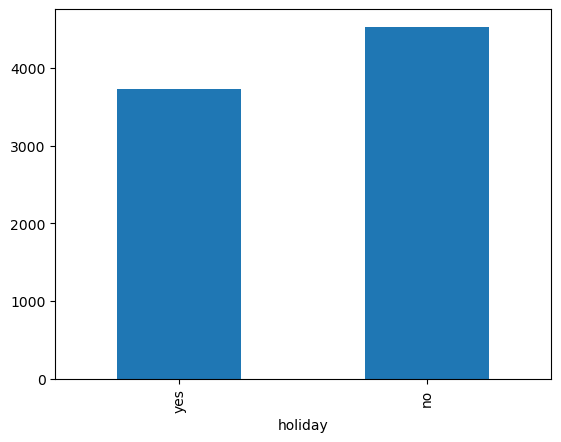

In [101]:
# Barplot of holiday vs. cnt
bikedf.groupby('holiday')['cnt'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Mean count of customers was higher on days which were not holidays than days which were holidays.

</div>

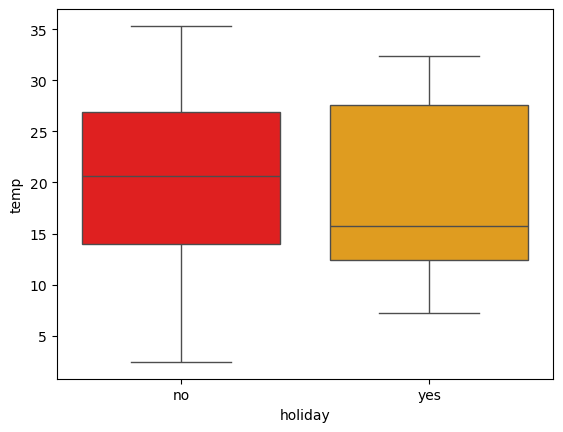

In [103]:
# Relation of holiday with temperature
sns.boxplot(x = "holiday", y = "temp", data = bikedf, palette=['r', 'orange'])
plt.show()

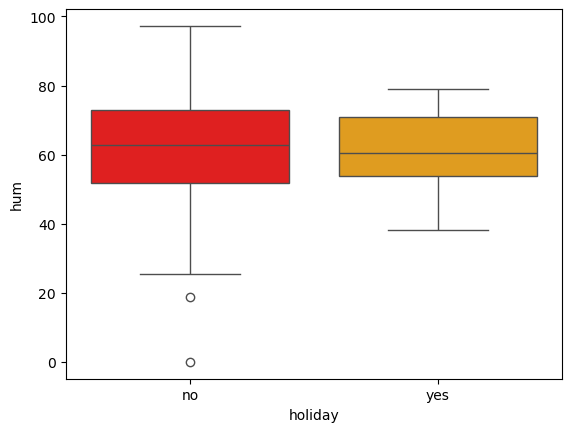

In [104]:
# Relation of holiday with humidity
sns.boxplot(x = "holiday", y = "hum", data = bikedf, palette=['r', 'orange', 'y', 'g', 'b', 'm', 'c', 'k', 'w', 'plum','skyblue'])
plt.show()

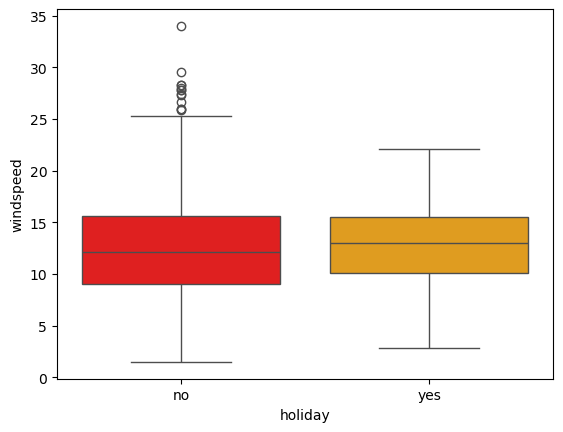

In [105]:
# Relation of holiday with windspeed
sns.boxplot(x = "holiday", y = "windspeed", data = bikedf, palette=['r', 'orange', 'y', 'g', 'b', 'm', 'c', 'k', 'w', 'plum','skyblue'])
plt.show()

### **6. Weekday**

In [107]:
# Count of non-null and unique values 
bikedf.weekday.describe()

count     730
unique      7
top       mon
freq      105
Name: weekday, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There are 7 unique values in the 'weekday' variable.
 - The most frequently occuring value is 'mon'.

</div>

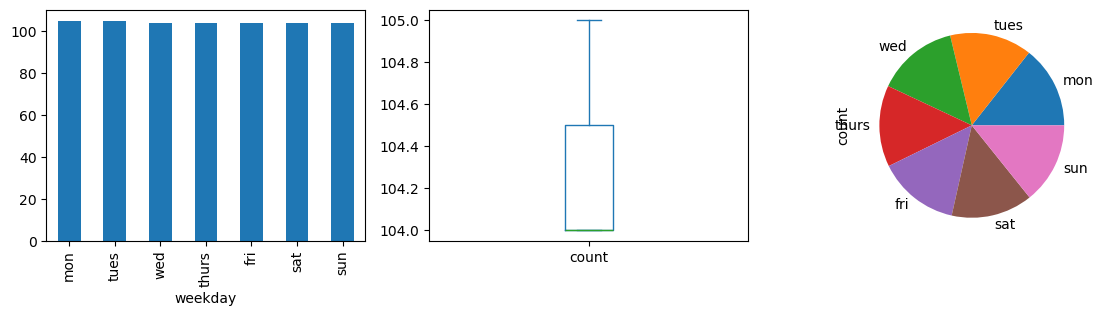

In [109]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (14,3))
plt.subplot(1,3,1)
bikedf['weekday'].value_counts().plot.bar()
plt.subplot(1,3,2)
bikedf['weekday'].value_counts().plot.box()
plt.subplot(1,3,3)
bikedf['weekday'].value_counts().plot.pie()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - All weekdays have almost equal representation with 'mon' and 'tues' have 1 additional value over the other days.
 - There are no outliers in the variable.

</div>

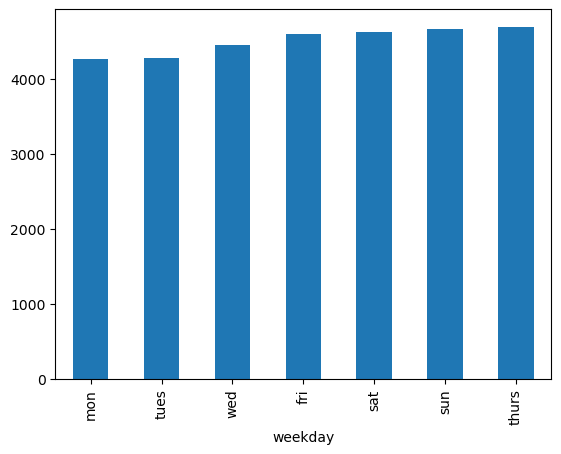

In [111]:
# Barplot of weekday vs. cnt
bikedf.groupby('weekday')['cnt'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Mean count of customers was highest on Thursdays, followed by Sundays, Saturdays and Fridays. The count was lowest on Mondays.

</div>

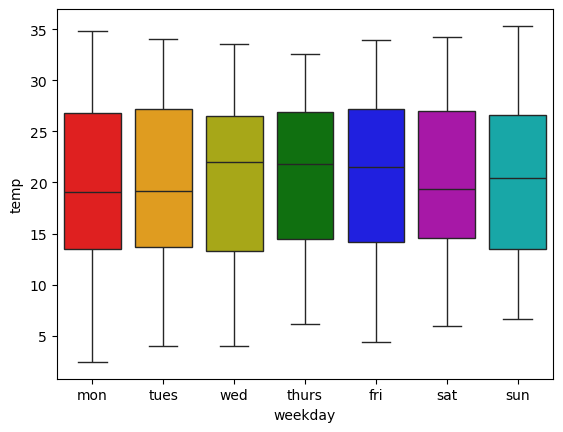

In [113]:
# Relation of weekday with temperature
sns.boxplot(x = "weekday", y = "temp", data = bikedf, palette=['r', 'orange', 'y', 'g', 'b', 'm', 'c'])
plt.show()

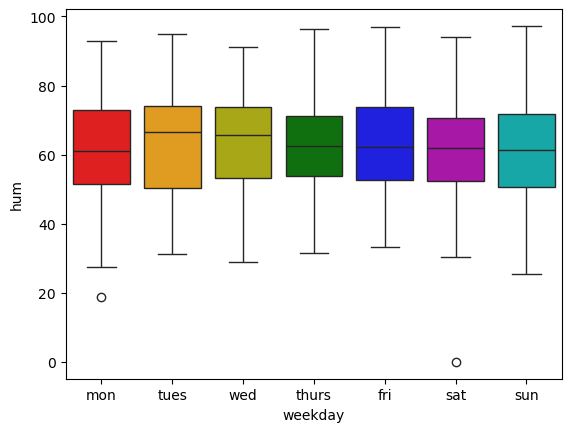

In [114]:
# Relation of weekday with humidity
sns.boxplot(x = "weekday", y = "hum", data = bikedf, palette=['r', 'orange', 'y', 'g', 'b', 'm', 'c'])
plt.show()

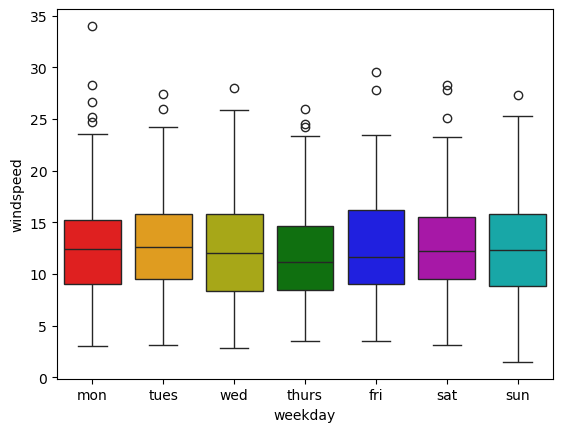

In [115]:
# Relation of weekday with windspeed
sns.boxplot(x = "weekday", y = "windspeed", data = bikedf, palette=['r', 'orange', 'y', 'g', 'b', 'm', 'c'])
plt.show()

### **7. Workingday**

In [117]:
# Count of non-null and unique values 
bikedf.workingday.describe()

count         730
unique          2
top       workday
freq          504
Name: workingday, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There are 2 unique values in the 'workingday' variable.
 - The most frequently occuring value is 'workday'.

</div>

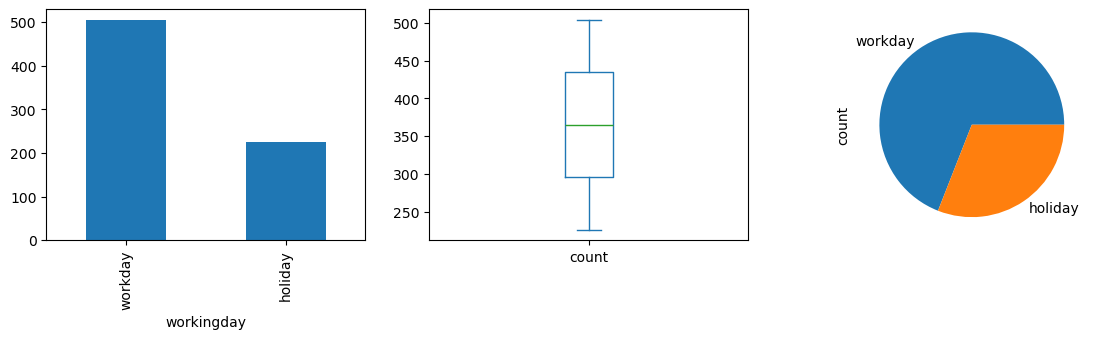

In [119]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (14,3))
plt.subplot(1,3,1)
bikedf['workingday'].value_counts().plot.bar()
plt.subplot(1,3,2)
bikedf['workingday'].value_counts().plot.box()
plt.subplot(1,3,3)
bikedf['workingday'].value_counts().plot.pie()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Workingdays which are 'workday' have higher representation than workingdays that are 'holiday'.
 - There are no outliers in the variable.

</div>

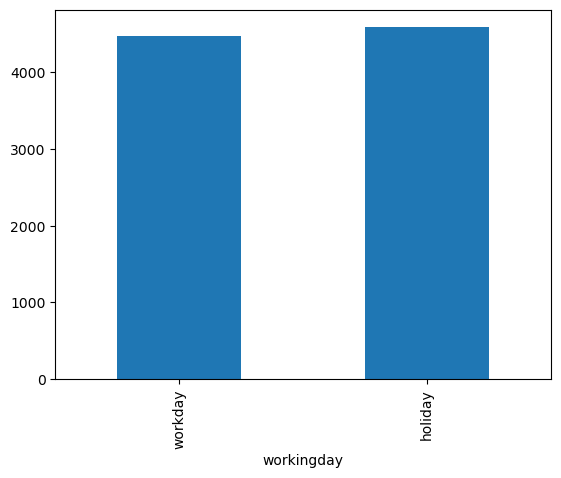

In [121]:
# Barplot of workingday vs. cnt
bikedf.groupby('workingday')['cnt'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Mean count of customers was higher on holidays than workdays.

</div>

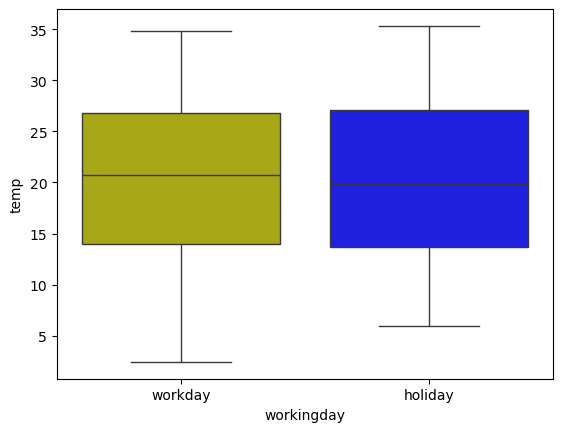

In [123]:
# Relation of workingday with temperature
sns.boxplot(x = "workingday", y = "temp", data = bikedf, palette=['y', 'b'])
plt.show()

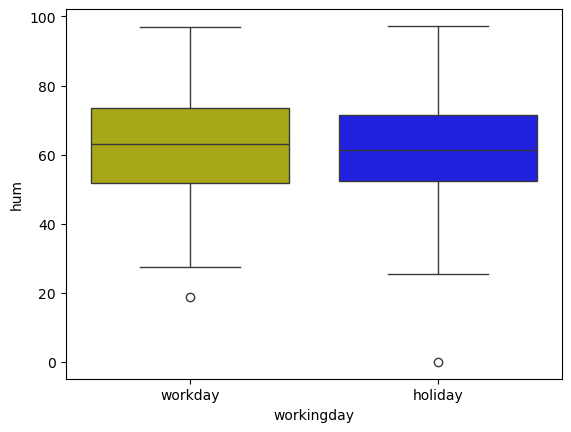

In [124]:
# Relation of workingday with humidity
sns.boxplot(x = "workingday", y = "hum", data = bikedf, palette=['y', 'b'])
plt.show()

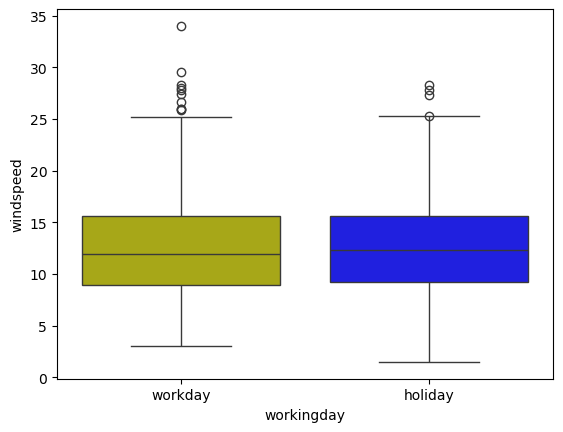

In [125]:
# Relation of workingday with windspeed
sns.boxplot(x = "workingday", y = "windspeed", data = bikedf, palette=['y', 'b'])
plt.show()

### **8. Weathersit**

In [127]:
# Count of non-null and unique values 
bikedf.weathersit.describe()

count                     730
unique                      3
top       partly_cloudy_clear
freq                      463
Name: weathersit, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There are 3 unique values in the 'weathersit' variable.
 - The most frequently occuring value is 'partly_cloudy_clear'.

</div>

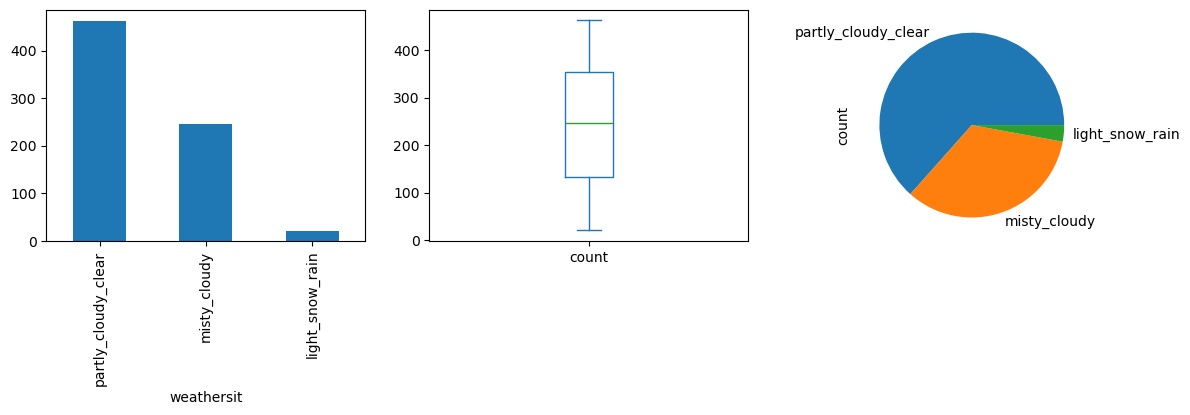

In [129]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (14,3))
plt.subplot(1,3,1)
bikedf['weathersit'].value_counts().plot.bar()
plt.subplot(1,3,2)
bikedf['weathersit'].value_counts().plot.box()
plt.subplot(1,3,3)
bikedf['weathersit'].value_counts().plot.pie()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 'partly_cloudy_clear' weather has highest representation while 'light_snow_rain' has lowest.
 - There are no outliers in the variable.

</div>

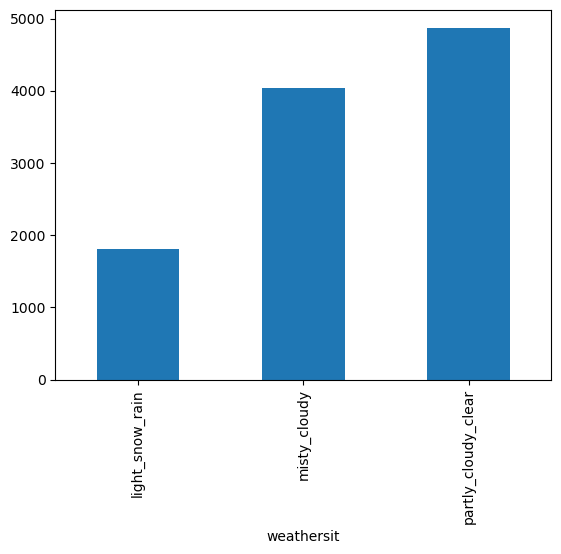

In [131]:
# Barplot of weathersit vs. cnt
bikedf.groupby('weathersit')['cnt'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Mean count of customers was highest on days with 'partly_cloudy_clear' weather and lowest on days with 'light_snow_rain'.

</div>

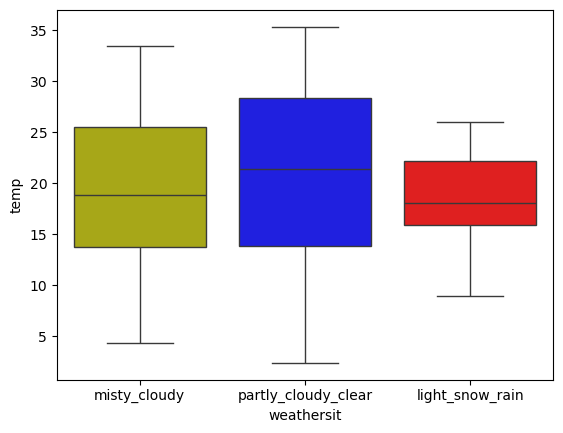

In [133]:
# Relation of weathersit with temperature
sns.boxplot(x = "weathersit", y = "temp", data = bikedf, palette=['y', 'b', 'r'])
plt.show()

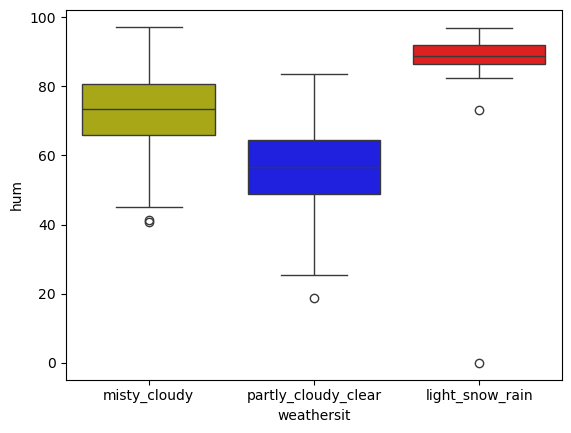

In [134]:
# Relation of weathersit with humidity
sns.boxplot(x = "weathersit", y = "hum", data = bikedf, palette=['y', 'b', 'r'])
plt.show()

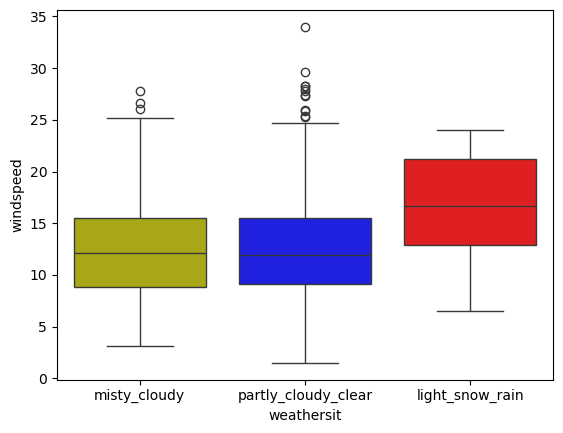

In [135]:
# Relation of weathersit with windspeed
sns.boxplot(x = "weathersit", y = "windspeed", data = bikedf, palette=['y', 'b', 'r'])
plt.show()

### **9. Temperature**

In [137]:
# Count of non-null values 
bikedf.temp.describe()

count   730.00
mean     20.32
std       7.51
min       2.42
25%      13.81
50%      20.47
75%      26.88
max      35.33
Name: temp, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The variable refers to the temperature on that day in Celsius.
 - The mean and median of the variable are fairly close with the values increasing gradually towards the max value.

</div>

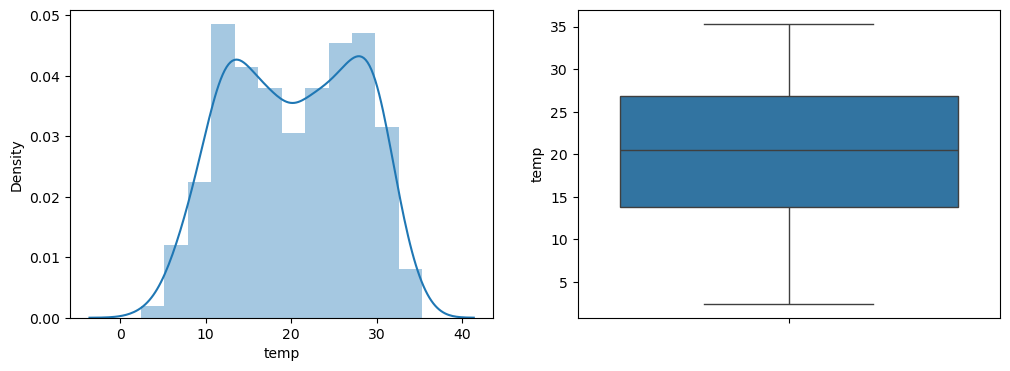

In [139]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(bikedf['temp'])
plt.subplot(1,2,2)
sns.boxplot(bikedf['temp'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The distribution seems to be bimodal.
 - There are no outliers.

</div>

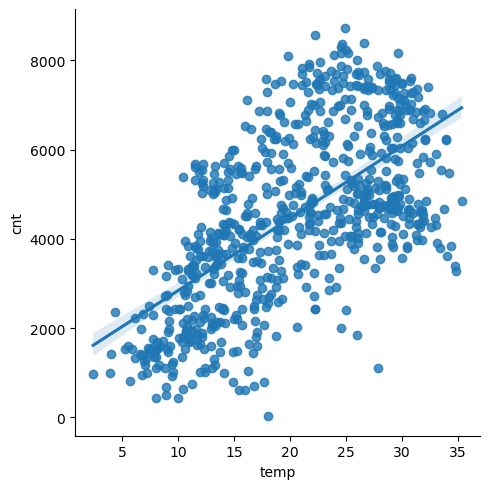

In [141]:
# Regression line plot of temp vs. cnt
sns.lmplot(data=bikedf, x='temp', y='cnt')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There seems to be a strong positive relationship between temp and cnt variables. 

</div>

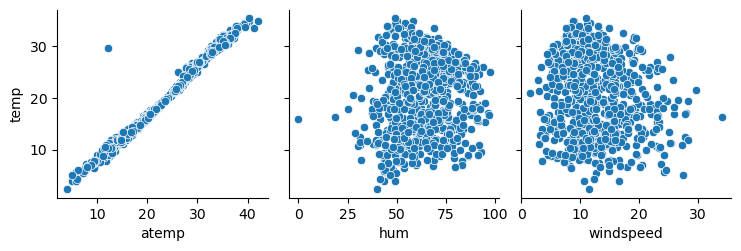

In [143]:
# Scatter plot of temp with other numerical variables
sns.pairplot(bikedf, x_vars=['atemp','hum','windspeed'], y_vars='temp', kind='scatter')
plt.show()

### **10. Felt Temperature**

In [145]:
# Count of non-null values 
bikedf.atemp.describe()

count   730.00
mean     23.73
std       8.15
min       3.95
25%      16.89
50%      24.37
75%      30.45
max      42.04
Name: atemp, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The variable refers to the felt temperature on that day in Celsius.
 - The mean and median of the variable are fairly close with the values increasing gradually towards the max value.

</div>

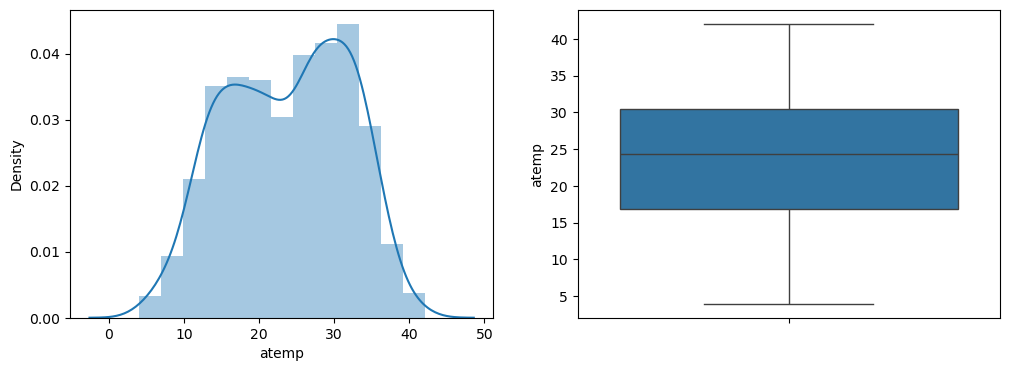

In [147]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(bikedf['atemp'])
plt.subplot(1,2,2)
sns.boxplot(bikedf['atemp'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The distribution seems to be near normal.
 - There are no outliers.

</div>

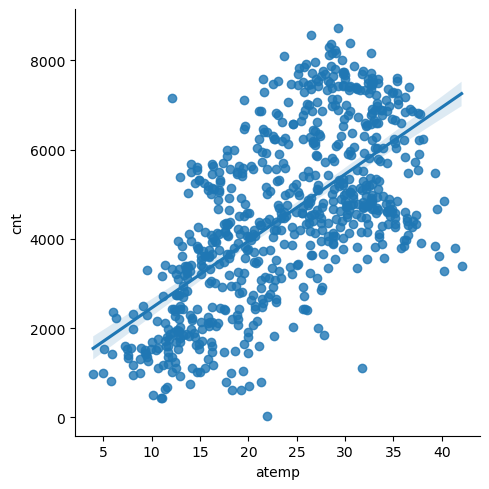

In [149]:
# Regression line plot of atemp vs. cnt
sns.lmplot(data=bikedf, x='atemp', y='cnt')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There seems to be a positive relationship between atemp and cnt variables. 

</div>

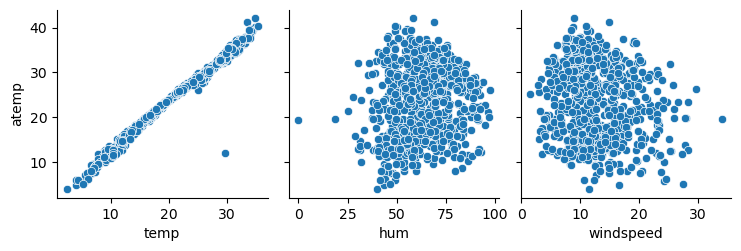

In [151]:
# Scatter plot of atemp with other numerical variables
sns.pairplot(bikedf, x_vars=['temp','hum','windspeed'], y_vars='atemp', kind='scatter')
plt.show()

### **11. Humidity**

In [153]:
# Count of non-null values 
bikedf.hum.describe()

count   730.00
mean     62.77
std      14.24
min       0.00
25%      52.00
50%      62.62
75%      72.99
max      97.25
Name: hum, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The variable refers to the humidity on that day.
 - The mean and median of the variable are fairly close with the values increasing gradually towards the max value.
 - The min value and the mean value are quite far apart indicating presence of outliers.

</div>

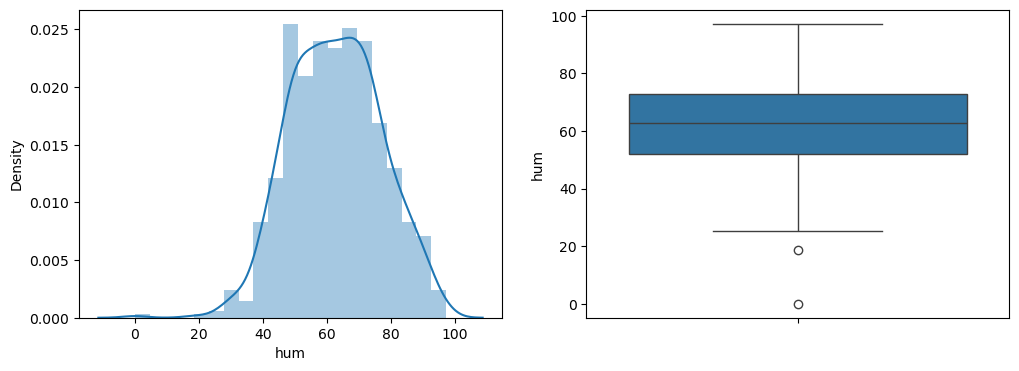

In [155]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(bikedf['hum'])
plt.subplot(1,2,2)
sns.boxplot(bikedf['hum'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The distribution seems to be normal.
 - There are some outliers towards the lower end.

</div>

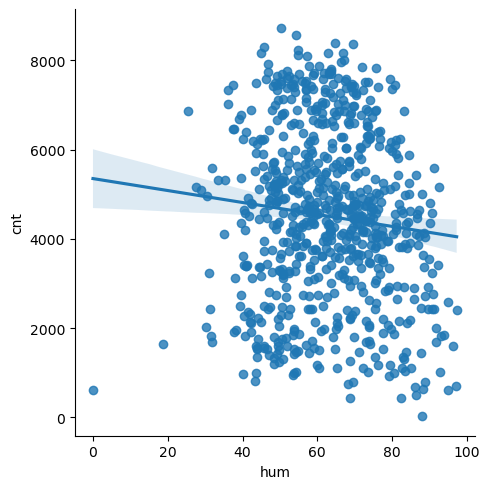

In [157]:
# Regression line plot of hum vs. cnt
sns.lmplot(data=bikedf, x='hum', y='cnt')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There seems to be a weak inverse relationship between humidity and cnt variables. 

</div>

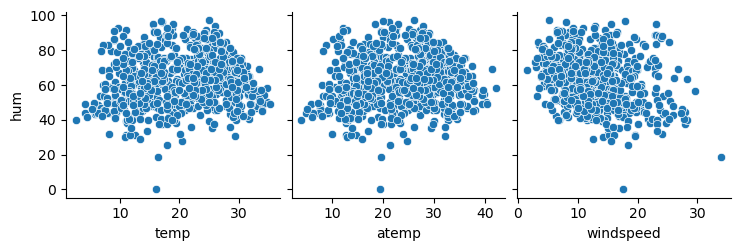

In [159]:
# Scatter plot of hum with other numerical variables
sns.pairplot(bikedf, x_vars=['temp','atemp','windspeed'], y_vars='hum', kind='scatter')
plt.show()

### **12. Windspeed**

In [161]:
# Count of non-null values 
bikedf.windspeed.describe()

count   730.00
mean     12.76
std       5.20
min       1.50
25%       9.04
50%      12.13
75%      15.63
max      34.00
Name: windspeed, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The variable refers to the windspeed on that day.
 - The mean and median of the variable are fairly close with the values increasing sharply towards the max value indicating presence of outliers.

</div>

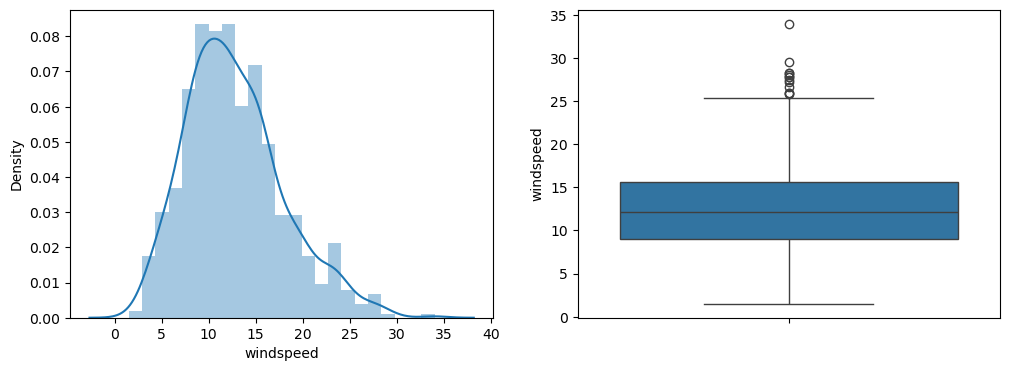

In [163]:
# Checking distribution and outliers in the variable
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(bikedf['windspeed'])
plt.subplot(1,2,2)
sns.boxplot(bikedf['windspeed'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The distribution seems to be near normal.
 - There are some outliers towards the higher end.

</div>

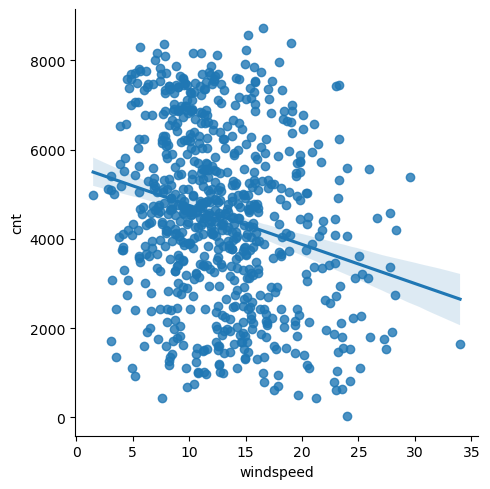

In [165]:
# Regression line plot of windspeed vs. cnt
sns.lmplot(data=bikedf, x='windspeed', y='cnt')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There seems to be an inverse relationship between windspeed and cnt variables. 

</div>

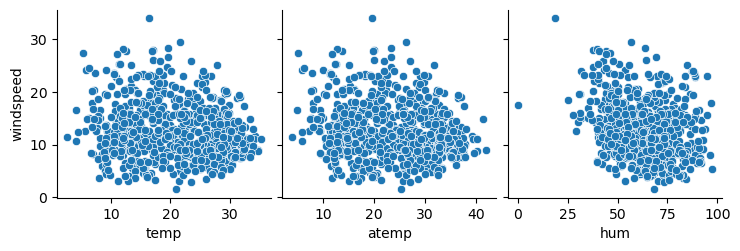

In [167]:
# Scatter plot of windspeed with other numerical variables
sns.pairplot(bikedf, x_vars=['temp','atemp','hum'], y_vars='windspeed', kind='scatter')
plt.show()

## Data Formatting and Feature Engineering

In [169]:
# One hot encoding of 'season' column through pandas
season_new=pd.get_dummies(bikedf.season, dtype=int, drop_first=True)
season_new.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [170]:
# Add the 'season_new' to the original bikedf dataframe
bikedf = pd.concat([bikedf, season_new], axis = 1)
bikedf.head()

dteday  season    yr mnth holiday weekday workingday  \
0  01-01-2018  spring  2018  jan      no     mon    workday   
1  02-01-2018  spring  2018  jan      no    tues    workday   
2  03-01-2018  spring  2018  jan      no     wed    workday   
3  04-01-2018  spring  2018  jan      no   thurs    workday   
4  05-01-2018  spring  2018  jan      no     fri    workday   

            weathersit  temp  atemp   hum  windspeed   cnt  spring  summer  \
0         misty_cloudy 14.11  18.18 80.58      10.75   985       1       0   
1         misty_cloudy 14.90  17.69 69.61      16.65   801       1       0   
2  partly_cloudy_clear  8.05   9.47 43.73      16.64  1349       1       0   
3  partly_cloudy_clear  8.20  10.61 59.04      10.74  1562       1       0   
4  partly_cloudy_clear  9.31  11.46 43.70      12.52  1600       1       0   

   winter  
0       0  
1       0  
2       0  
3       0  
4       0

In [171]:
# Dropping 'season' column from the dataframe
bikedf=bikedf.drop('season', axis=1)
bikedf.head()

dteday    yr mnth holiday weekday workingday           weathersit  \
0  01-01-2018  2018  jan      no     mon    workday         misty_cloudy   
1  02-01-2018  2018  jan      no    tues    workday         misty_cloudy   
2  03-01-2018  2018  jan      no     wed    workday  partly_cloudy_clear   
3  04-01-2018  2018  jan      no   thurs    workday  partly_cloudy_clear   
4  05-01-2018  2018  jan      no     fri    workday  partly_cloudy_clear   

   temp  atemp   hum  windspeed   cnt  spring  summer  winter  
0 14.11  18.18 80.58      10.75   985       1       0       0  
1 14.90  17.69 69.61      16.65   801       1       0       0  
2  8.05   9.47 43.73      16.64  1349       1       0       0  
3  8.20  10.61 59.04      10.74  1562       1       0       0  
4  9.31  11.46 43.70      12.52  1600       1       0       0

<Html><mark>'season' column dropped from the dataset.</mark></Html>

In [173]:
# One hot encoding of 'yr' column through pandas
year = pd.get_dummies(bikedf.yr, dtype=int, drop_first=True)
year.head()

2019
0     0
1     0
2     0
3     0
4     0

In [174]:
# Add 'year' to the original bikedf dataframe
bikedf = pd.concat([bikedf, year], axis = 1)
bikedf.head()

dteday    yr mnth holiday weekday workingday           weathersit  \
0  01-01-2018  2018  jan      no     mon    workday         misty_cloudy   
1  02-01-2018  2018  jan      no    tues    workday         misty_cloudy   
2  03-01-2018  2018  jan      no     wed    workday  partly_cloudy_clear   
3  04-01-2018  2018  jan      no   thurs    workday  partly_cloudy_clear   
4  05-01-2018  2018  jan      no     fri    workday  partly_cloudy_clear   

   temp  atemp   hum  windspeed   cnt  spring  summer  winter  2019  
0 14.11  18.18 80.58      10.75   985       1       0       0     0  
1 14.90  17.69 69.61      16.65   801       1       0       0     0  
2  8.05   9.47 43.73      16.64  1349       1       0       0     0  
3  8.20  10.61 59.04      10.74  1562       1       0       0     0  
4  9.31  11.46 43.70      12.52  1600       1       0       0     0

In [175]:
# Dropping 'yr' column from the dataframe
bikedf=bikedf.drop('yr', axis=1)
bikedf.head()

dteday mnth holiday weekday workingday           weathersit  temp  \
0  01-01-2018  jan      no     mon    workday         misty_cloudy 14.11   
1  02-01-2018  jan      no    tues    workday         misty_cloudy 14.90   
2  03-01-2018  jan      no     wed    workday  partly_cloudy_clear  8.05   
3  04-01-2018  jan      no   thurs    workday  partly_cloudy_clear  8.20   
4  05-01-2018  jan      no     fri    workday  partly_cloudy_clear  9.31   

   atemp   hum  windspeed   cnt  spring  summer  winter  2019  
0  18.18 80.58      10.75   985       1       0       0     0  
1  17.69 69.61      16.65   801       1       0       0     0  
2   9.47 43.73      16.64  1349       1       0       0     0  
3  10.61 59.04      10.74  1562       1       0       0     0  
4  11.46 43.70      12.52  1600       1       0       0     0

<Html><mark>yr column dropped from the dataset.</mark></Html>

In [177]:
# One hot encoding of 'mnth' column through pandas
month = pd.get_dummies(bikedf.mnth, dtype=int, drop_first=True)
month.head()

aug  dec  feb  jan  july  june  march  may  nov  oct  sep
0    0    0    0    1     0     0      0    0    0    0    0
1    0    0    0    1     0     0      0    0    0    0    0
2    0    0    0    1     0     0      0    0    0    0    0
3    0    0    0    1     0     0      0    0    0    0    0
4    0    0    0    1     0     0      0    0    0    0    0

In [178]:
# Add 'month' to the original bikedf dataframe
bikedf = pd.concat([bikedf, month], axis = 1)
bikedf.head()

dteday mnth holiday weekday workingday           weathersit  temp  \
0  01-01-2018  jan      no     mon    workday         misty_cloudy 14.11   
1  02-01-2018  jan      no    tues    workday         misty_cloudy 14.90   
2  03-01-2018  jan      no     wed    workday  partly_cloudy_clear  8.05   
3  04-01-2018  jan      no   thurs    workday  partly_cloudy_clear  8.20   
4  05-01-2018  jan      no     fri    workday  partly_cloudy_clear  9.31   

   atemp   hum  windspeed   cnt  spring  summer  winter  2019  aug  dec  feb  \
0  18.18 80.58      10.75   985       1       0       0     0    0    0    0   
1  17.69 69.61      16.65   801       1       0       0     0    0    0    0   
2   9.47 43.73      16.64  1349       1       0       0     0    0    0    0   
3  10.61 59.04      10.74  1562       1       0       0     0    0    0    0   
4  11.46 43.70      12.52  1600       1       0       0     0    0    0    0   

   jan  july  june  march  may  nov  oct  sep  
0    1     0     0      0    0    0    0    0  
1    1     0     0      0    0    0    0    0  
2    1     0     0      0    0    0    0    0  
3    1     0     0      0    0    0    0    0  
4    1     0     0      0    0    0    0    0

In [179]:
# Dropping 'mnth' column from the dataframe
bikedf=bikedf.drop('mnth', axis=1)
bikedf.head()

dteday holiday weekday workingday           weathersit  temp  atemp  \
0  01-01-2018      no     mon    workday         misty_cloudy 14.11  18.18   
1  02-01-2018      no    tues    workday         misty_cloudy 14.90  17.69   
2  03-01-2018      no     wed    workday  partly_cloudy_clear  8.05   9.47   
3  04-01-2018      no   thurs    workday  partly_cloudy_clear  8.20  10.61   
4  05-01-2018      no     fri    workday  partly_cloudy_clear  9.31  11.46   

    hum  windspeed   cnt  spring  summer  winter  2019  aug  dec  feb  jan  \
0 80.58      10.75   985       1       0       0     0    0    0    0    1   
1 69.61      16.65   801       1       0       0     0    0    0    0    1   
2 43.73      16.64  1349       1       0       0     0    0    0    0    1   
3 59.04      10.74  1562       1       0       0     0    0    0    0    1   
4 43.70      12.52  1600       1       0       0     0    0    0    0    1   

   july  june  march  may  nov  oct  sep  
0     0     0      0    0    0    0    0  
1     0     0      0    0    0    0    0  
2     0     0      0    0    0    0    0  
3     0     0      0    0    0    0    0  
4     0     0      0    0    0    0    0

<Html><mark>mnth column dropped from the dataset.</mark></Html>

In [181]:
# One hot encoding of 'holiday' column through pandas
hday = pd.get_dummies(bikedf.holiday, dtype=int, drop_first=True)
hday.head()

yes
0    0
1    0
2    0
3    0
4    0

In [182]:
# Add 'hday' to the original bikedf dataframe
bikedf = pd.concat([bikedf, hday], axis = 1)
bikedf.head()

dteday holiday weekday workingday           weathersit  temp  atemp  \
0  01-01-2018      no     mon    workday         misty_cloudy 14.11  18.18   
1  02-01-2018      no    tues    workday         misty_cloudy 14.90  17.69   
2  03-01-2018      no     wed    workday  partly_cloudy_clear  8.05   9.47   
3  04-01-2018      no   thurs    workday  partly_cloudy_clear  8.20  10.61   
4  05-01-2018      no     fri    workday  partly_cloudy_clear  9.31  11.46   

    hum  windspeed   cnt  spring  summer  winter  2019  aug  dec  feb  jan  \
0 80.58      10.75   985       1       0       0     0    0    0    0    1   
1 69.61      16.65   801       1       0       0     0    0    0    0    1   
2 43.73      16.64  1349       1       0       0     0    0    0    0    1   
3 59.04      10.74  1562       1       0       0     0    0    0    0    1   
4 43.70      12.52  1600       1       0       0     0    0    0    0    1   

   july  june  march  may  nov  oct  sep  yes  
0     0     0      0    0    0    0    0    0  
1     0     0      0    0    0    0    0    0  
2     0     0      0    0    0    0    0    0  
3     0     0      0    0    0    0    0    0  
4     0     0      0    0    0    0    0    0

In [183]:
# Dropping 'holiday' column from the dataframe
bikedf=bikedf.drop('holiday', axis=1)
bikedf.head()

dteday weekday workingday           weathersit  temp  atemp   hum  \
0  01-01-2018     mon    workday         misty_cloudy 14.11  18.18 80.58   
1  02-01-2018    tues    workday         misty_cloudy 14.90  17.69 69.61   
2  03-01-2018     wed    workday  partly_cloudy_clear  8.05   9.47 43.73   
3  04-01-2018   thurs    workday  partly_cloudy_clear  8.20  10.61 59.04   
4  05-01-2018     fri    workday  partly_cloudy_clear  9.31  11.46 43.70   

   windspeed   cnt  spring  summer  winter  2019  aug  dec  feb  jan  july  \
0      10.75   985       1       0       0     0    0    0    0    1     0   
1      16.65   801       1       0       0     0    0    0    0    1     0   
2      16.64  1349       1       0       0     0    0    0    0    1     0   
3      10.74  1562       1       0       0     0    0    0    0    1     0   
4      12.52  1600       1       0       0     0    0    0    0    1     0   

   june  march  may  nov  oct  sep  yes  
0     0      0    0    0    0    0    0  
1     0      0    0    0    0    0    0  
2     0      0    0    0    0    0    0  
3     0      0    0    0    0    0    0  
4     0      0    0    0    0    0    0

<Html><mark>holiday column dropped from the dataset.</mark></Html>

In [185]:
# One hot encoding of 'weekday' column through pandas
week_day = pd.get_dummies(bikedf.weekday, dtype=int, prefix="weekday",prefix_sep ="_", drop_first=True)
week_day.head(7)

weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
0            1            0            0              0             0   
1            0            0            0              0             1   
2            0            0            0              0             0   
3            0            0            0              1             0   
4            0            0            0              0             0   
5            0            1            0              0             0   
6            0            0            1              0             0   

   weekday_wed  
0            0  
1            0  
2            1  
3            0  
4            0  
5            0  
6            0

In [186]:
# Add 'week_day' to the original bikedf dataframe
bikedf = pd.concat([bikedf, week_day], axis = 1)
bikedf.head()

dteday weekday workingday           weathersit  temp  atemp   hum  \
0  01-01-2018     mon    workday         misty_cloudy 14.11  18.18 80.58   
1  02-01-2018    tues    workday         misty_cloudy 14.90  17.69 69.61   
2  03-01-2018     wed    workday  partly_cloudy_clear  8.05   9.47 43.73   
3  04-01-2018   thurs    workday  partly_cloudy_clear  8.20  10.61 59.04   
4  05-01-2018     fri    workday  partly_cloudy_clear  9.31  11.46 43.70   

   windspeed   cnt  spring  summer  winter  2019  aug  dec  feb  jan  july  \
0      10.75   985       1       0       0     0    0    0    0    1     0   
1      16.65   801       1       0       0     0    0    0    0    1     0   
2      16.64  1349       1       0       0     0    0    0    0    1     0   
3      10.74  1562       1       0       0     0    0    0    0    1     0   
4      12.52  1600       1       0       0     0    0    0    0    1     0   

   june  march  may  nov  oct  sep  yes  weekday_mon  weekday_sat  \
0     0      0    0    0    0    0    0            1            0   
1     0      0    0    0    0    0    0            0            0   
2     0      0    0    0    0    0    0            0            0   
3     0      0    0    0    0    0    0            0            0   
4     0      0    0    0    0    0    0            0            0   

   weekday_sun  weekday_thurs  weekday_tues  weekday_wed  
0            0              0             0            0  
1            0              0             1            0  
2            0              0             0            1  
3            0              1             0            0  
4            0              0             0            0

In [187]:
# Dropping 'weekday' column from the dataframe
bikedf=bikedf.drop('weekday', axis=1)
bikedf.head()

dteday workingday           weathersit  temp  atemp   hum  windspeed  \
0  01-01-2018    workday         misty_cloudy 14.11  18.18 80.58      10.75   
1  02-01-2018    workday         misty_cloudy 14.90  17.69 69.61      16.65   
2  03-01-2018    workday  partly_cloudy_clear  8.05   9.47 43.73      16.64   
3  04-01-2018    workday  partly_cloudy_clear  8.20  10.61 59.04      10.74   
4  05-01-2018    workday  partly_cloudy_clear  9.31  11.46 43.70      12.52   

    cnt  spring  summer  winter  2019  aug  dec  feb  jan  july  june  march  \
0   985       1       0       0     0    0    0    0    1     0     0      0   
1   801       1       0       0     0    0    0    0    1     0     0      0   
2  1349       1       0       0     0    0    0    0    1     0     0      0   
3  1562       1       0       0     0    0    0    0    1     0     0      0   
4  1600       1       0       0     0    0    0    0    1     0     0      0   

   may  nov  oct  sep  yes  weekday_mon  weekday_sat  weekday_sun  \
0    0    0    0    0    0            1            0            0   
1    0    0    0    0    0            0            0            0   
2    0    0    0    0    0            0            0            0   
3    0    0    0    0    0            0            0            0   
4    0    0    0    0    0            0            0            0   

   weekday_thurs  weekday_tues  weekday_wed  
0              0             0            0  
1              0             1            0  
2              0             0            1  
3              1             0            0  
4              0             0            0

<Html><mark>weekday column dropped from the dataset.</mark></Html>

In [189]:
# One hot encoding of 'workingday' column through pandas
working_day = pd.get_dummies(bikedf.workingday, dtype=int, drop_first=True)
working_day.head()

workday
0        1
1        1
2        1
3        1
4        1

In [190]:
# Add the 'working_day' to the original bikedf dataframe
bikedf = pd.concat([bikedf, working_day], axis = 1)
bikedf.head()

dteday workingday           weathersit  temp  atemp   hum  windspeed  \
0  01-01-2018    workday         misty_cloudy 14.11  18.18 80.58      10.75   
1  02-01-2018    workday         misty_cloudy 14.90  17.69 69.61      16.65   
2  03-01-2018    workday  partly_cloudy_clear  8.05   9.47 43.73      16.64   
3  04-01-2018    workday  partly_cloudy_clear  8.20  10.61 59.04      10.74   
4  05-01-2018    workday  partly_cloudy_clear  9.31  11.46 43.70      12.52   

    cnt  spring  summer  winter  2019  aug  dec  feb  jan  july  june  march  \
0   985       1       0       0     0    0    0    0    1     0     0      0   
1   801       1       0       0     0    0    0    0    1     0     0      0   
2  1349       1       0       0     0    0    0    0    1     0     0      0   
3  1562       1       0       0     0    0    0    0    1     0     0      0   
4  1600       1       0       0     0    0    0    0    1     0     0      0   

   may  nov  oct  sep  yes  weekday_mon  weekday_sat  weekday_sun  \
0    0    0    0    0    0            1            0            0   
1    0    0    0    0    0            0            0            0   
2    0    0    0    0    0            0            0            0   
3    0    0    0    0    0            0            0            0   
4    0    0    0    0    0            0            0            0   

   weekday_thurs  weekday_tues  weekday_wed  workday  
0              0             0            0        1  
1              0             1            0        1  
2              0             0            1        1  
3              1             0            0        1  
4              0             0            0        1

In [191]:
# Dropping 'workingday' column from the dataframe
bikedf=bikedf.drop('workingday', axis=1)
bikedf.head()

dteday           weathersit  temp  atemp   hum  windspeed   cnt  \
0  01-01-2018         misty_cloudy 14.11  18.18 80.58      10.75   985   
1  02-01-2018         misty_cloudy 14.90  17.69 69.61      16.65   801   
2  03-01-2018  partly_cloudy_clear  8.05   9.47 43.73      16.64  1349   
3  04-01-2018  partly_cloudy_clear  8.20  10.61 59.04      10.74  1562   
4  05-01-2018  partly_cloudy_clear  9.31  11.46 43.70      12.52  1600   

   spring  summer  winter  2019  aug  dec  feb  jan  july  june  march  may  \
0       1       0       0     0    0    0    0    1     0     0      0    0   
1       1       0       0     0    0    0    0    1     0     0      0    0   
2       1       0       0     0    0    0    0    1     0     0      0    0   
3       1       0       0     0    0    0    0    1     0     0      0    0   
4       1       0       0     0    0    0    0    1     0     0      0    0   

   nov  oct  sep  yes  weekday_mon  weekday_sat  weekday_sun  weekday_thurs  \
0    0    0    0    0            1            0            0              0   
1    0    0    0    0            0            0            0              0   
2    0    0    0    0            0            0            0              0   
3    0    0    0    0            0            0            0              1   
4    0    0    0    0            0            0            0              0   

   weekday_tues  weekday_wed  workday  
0             0            0        1  
1             1            0        1  
2             0            1        1  
3             0            0        1  
4             0            0        1

<Html><mark>workingday column dropped from the dataset.</mark></Html>

In [193]:
# One hot encoding of 'weathersit' column through pandas
weather_sit = pd.get_dummies(bikedf.weathersit, dtype=int, drop_first=True)
weather_sit.head()

misty_cloudy  partly_cloudy_clear
0             1                    0
1             1                    0
2             0                    1
3             0                    1
4             0                    1

In [194]:
# Add the 'weather_sit' to the original bikedf dataframe
bikedf = pd.concat([bikedf, weather_sit], axis = 1)
bikedf.head()

dteday           weathersit  temp  atemp   hum  windspeed   cnt  \
0  01-01-2018         misty_cloudy 14.11  18.18 80.58      10.75   985   
1  02-01-2018         misty_cloudy 14.90  17.69 69.61      16.65   801   
2  03-01-2018  partly_cloudy_clear  8.05   9.47 43.73      16.64  1349   
3  04-01-2018  partly_cloudy_clear  8.20  10.61 59.04      10.74  1562   
4  05-01-2018  partly_cloudy_clear  9.31  11.46 43.70      12.52  1600   

   spring  summer  winter  2019  aug  dec  feb  jan  july  june  march  may  \
0       1       0       0     0    0    0    0    1     0     0      0    0   
1       1       0       0     0    0    0    0    1     0     0      0    0   
2       1       0       0     0    0    0    0    1     0     0      0    0   
3       1       0       0     0    0    0    0    1     0     0      0    0   
4       1       0       0     0    0    0    0    1     0     0      0    0   

   nov  oct  sep  yes  weekday_mon  weekday_sat  weekday_sun  weekday_thurs  \
0    0    0    0    0            1            0            0              0   
1    0    0    0    0            0            0            0              0   
2    0    0    0    0            0            0            0              0   
3    0    0    0    0            0            0            0              1   
4    0    0    0    0            0            0            0              0   

   weekday_tues  weekday_wed  workday  misty_cloudy  partly_cloudy_clear  
0             0            0        1             1                    0  
1             1            0        1             1                    0  
2             0            1        1             0                    1  
3             0            0        1             0                    1  
4             0            0        1             0                    1

In [195]:
# Dropping 'weathersit' column from the dataframe
bikedf=bikedf.drop('weathersit', axis=1)
bikedf.head()

dteday  temp  atemp   hum  windspeed   cnt  spring  summer  winter  \
0  01-01-2018 14.11  18.18 80.58      10.75   985       1       0       0   
1  02-01-2018 14.90  17.69 69.61      16.65   801       1       0       0   
2  03-01-2018  8.05   9.47 43.73      16.64  1349       1       0       0   
3  04-01-2018  8.20  10.61 59.04      10.74  1562       1       0       0   
4  05-01-2018  9.31  11.46 43.70      12.52  1600       1       0       0   

   2019  aug  dec  feb  jan  july  june  march  may  nov  oct  sep  yes  \
0     0    0    0    0    1     0     0      0    0    0    0    0    0   
1     0    0    0    0    1     0     0      0    0    0    0    0    0   
2     0    0    0    0    1     0     0      0    0    0    0    0    0   
3     0    0    0    0    1     0     0      0    0    0    0    0    0   
4     0    0    0    0    1     0     0      0    0    0    0    0    0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
0            1            0            0              0             0   
1            0            0            0              0             1   
2            0            0            0              0             0   
3            0            0            0              1             0   
4            0            0            0              0             0   

   weekday_wed  workday  misty_cloudy  partly_cloudy_clear  
0            0        1             1                    0  
1            0        1             1                    0  
2            1        1             0                    1  
3            0        1             0                    1  
4            0        1             0                    1

<Html><mark>'weathersit' column dropped from the dataset.</mark></Html>

In [197]:
# Converting date to Pandas datetime format
from datetime import datetime
bikedf['dteday'] = pd.to_datetime(bikedf['dteday'], format='mixed', errors='coerce')
bikedf['dteday'].head()

0   2018-01-01
1   2018-02-01
2   2018-03-01
3   2018-04-01
4   2018-05-01
Name: dteday, dtype: datetime64[ns]

In [198]:
bikedf.head()

dteday  temp  atemp   hum  windspeed   cnt  spring  summer  winter  \
0 2018-01-01 14.11  18.18 80.58      10.75   985       1       0       0   
1 2018-02-01 14.90  17.69 69.61      16.65   801       1       0       0   
2 2018-03-01  8.05   9.47 43.73      16.64  1349       1       0       0   
3 2018-04-01  8.20  10.61 59.04      10.74  1562       1       0       0   
4 2018-05-01  9.31  11.46 43.70      12.52  1600       1       0       0   

   2019  aug  dec  feb  jan  july  june  march  may  nov  oct  sep  yes  \
0     0    0    0    0    1     0     0      0    0    0    0    0    0   
1     0    0    0    0    1     0     0      0    0    0    0    0    0   
2     0    0    0    0    1     0     0      0    0    0    0    0    0   
3     0    0    0    0    1     0     0      0    0    0    0    0    0   
4     0    0    0    0    1     0     0      0    0    0    0    0    0   

   weekday_mon  weekday_sat  weekday_sun  weekday_thurs  weekday_tues  \
0            1            0            0              0             0   
1            0            0            0              0             1   
2            0            0            0              0             0   
3            0            0            0              1             0   
4            0            0            0              0             0   

   weekday_wed  workday  misty_cloudy  partly_cloudy_clear  
0            0        1             1                    0  
1            0        1             1                    0  
2            1        1             0                    1  
3            0        1             0                    1  
4            0        1             0                    1

<Figure size 1200x1200 with 0 Axes>

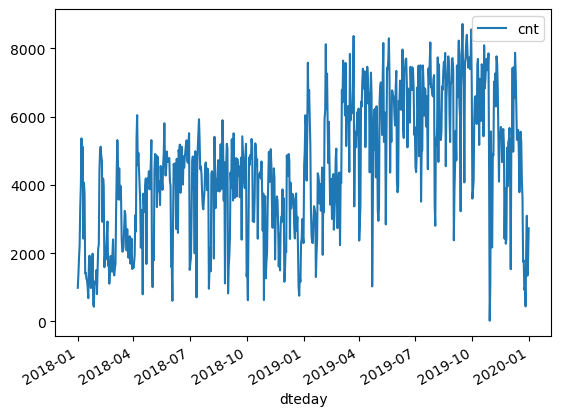

In [199]:
# dteday vs cnt
plt.figure(figsize = (12,12))
bikedf.plot.line(x='dteday', y='cnt')
plt.show()

### Outlier Analysis

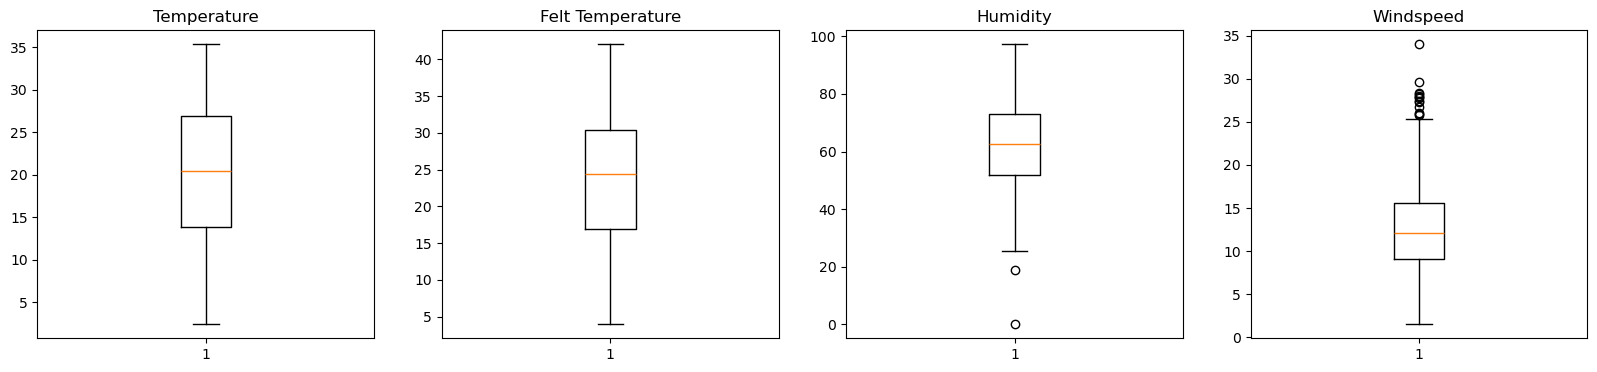

In [201]:
# Outlier Analysis for numerical variables
plt.figure(figsize = (20,4))
plt.subplot(1, 4, 1)
plt.boxplot(bikedf['temp'])
plt.title('Temperature')
plt.subplot(1, 4, 2)
plt.boxplot(bikedf['atemp'])
plt.title('Felt Temperature')
plt.subplot(1, 4, 3)
plt.boxplot(bikedf['hum'])
plt.title('Humidity')
plt.subplot(1, 4, 4)
plt.boxplot(bikedf['windspeed'])
plt.title('Windspeed')
plt.show()

<Html><mark>There are outliers in windspeed, humidity and count of casual customers.</mark></Html>

## Visualizing data

In [204]:
# Converting cnt to float to include it among other float variables
bikedf.cnt = bikedf.cnt.astype('float64')

In [205]:
# Checking if the cnt variable is included among float variables
bikedf.select_dtypes(include=['float64'])

temp  atemp   hum  windspeed      cnt
0   14.11  18.18 80.58      10.75   985.00
1   14.90  17.69 69.61      16.65   801.00
2    8.05   9.47 43.73      16.64 1,349.00
3    8.20  10.61 59.04      10.74 1,562.00
4    9.31  11.46 43.70      12.52 1,600.00
..    ...    ...   ...        ...      ...
725 10.42  11.33 65.29      23.46 2,114.00
726 10.39  12.75 59.00      10.42 3,095.00
727 10.39  12.12 75.29       8.33 1,341.00
728 10.49  11.59 48.33      23.50 1,796.00
729  8.85  11.17 57.75      10.37 2,729.00

[730 rows x 5 columns]

<Figure size 1000x400 with 0 Axes>

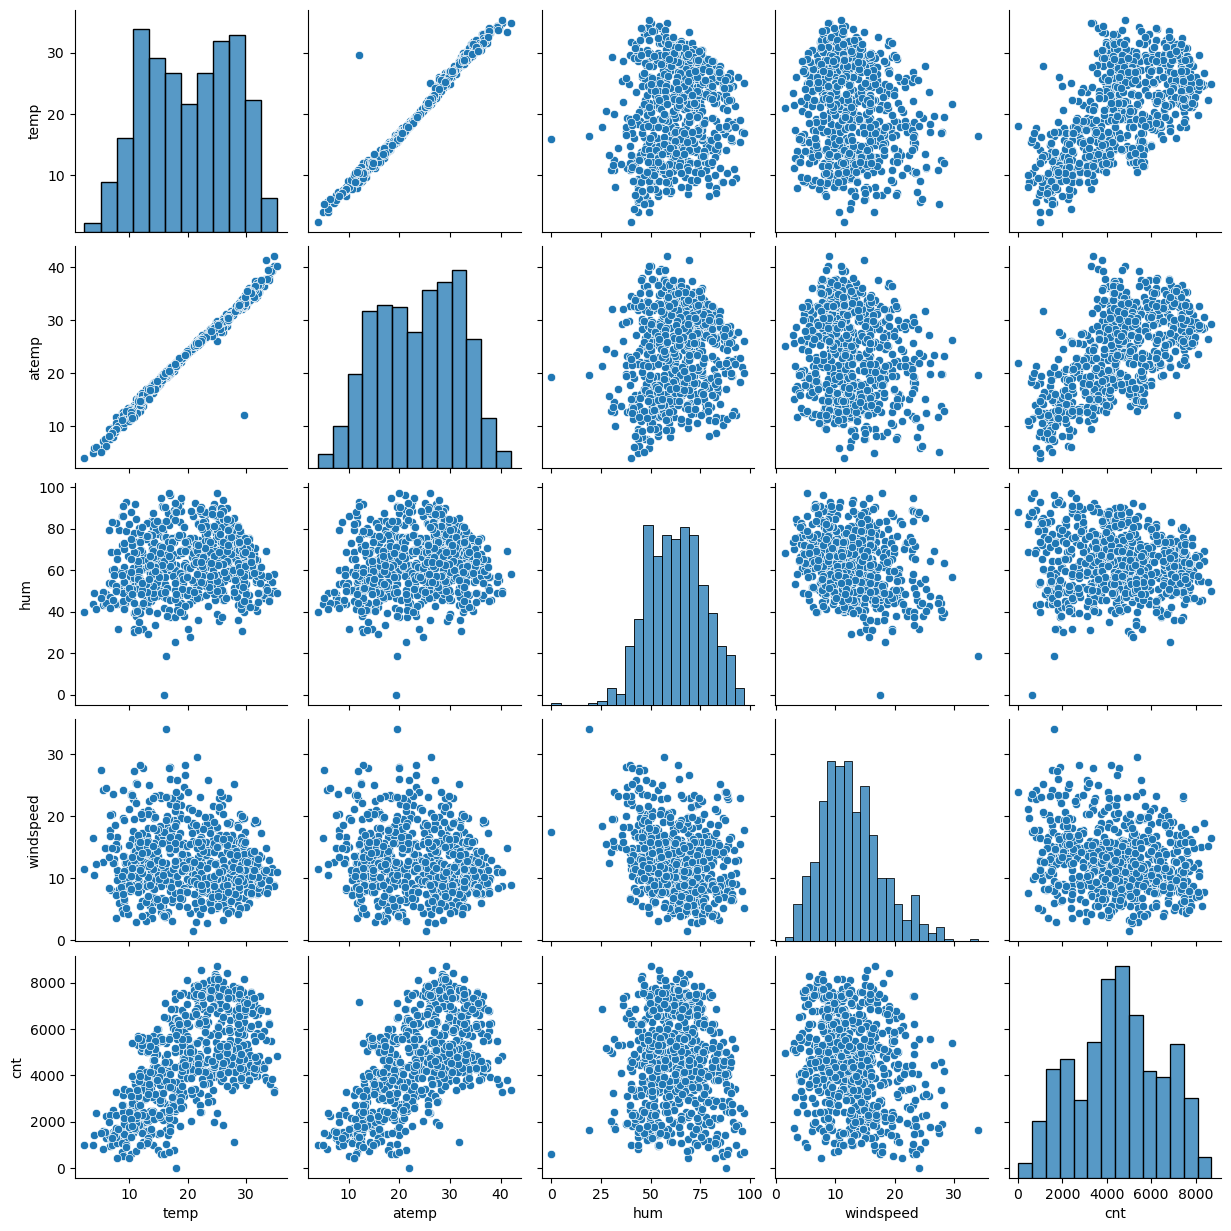

In [206]:
# Visualizing the correlation among the float variables
plt.figure(figsize = (10,4))
sns.pairplot(bikedf.select_dtypes(include=['float64']), kind='scatter')
plt.show()

In [207]:
# Dropping the atemp column as it is highly correlated with temp column and may lead to collinearity
bikedf.drop(['atemp'], axis=1, inplace=True)
bikedf.shape

(730, 30)

<Html><mark>atemp variable has been dropped from the database.</mark></Html>

In [209]:
# Dropping the dteday column as its details have already been extracted
bikedf.drop(['dteday'], axis=1, inplace=True)
bikedf.shape

(730, 29)

<Html><mark>dteday variable has been dropped from the database.</mark></Html>

In [211]:
bikedf.corr(numeric_only=True)

temp   hum  windspeed   cnt  spring  summer  winter  \
temp                 1.00  0.13      -0.16  0.63   -0.62    0.15   -0.23   
hum                  0.13  1.00      -0.25 -0.10   -0.18   -0.00    0.16   
windspeed           -0.16 -0.25       1.00 -0.24    0.18    0.10   -0.14   
cnt                  0.63 -0.10      -0.24  1.00   -0.56    0.15    0.06   
spring              -0.62 -0.18       0.18 -0.56    1.00   -0.33   -0.32   
summer               0.15 -0.00       0.10  0.15   -0.33    1.00   -0.33   
winter              -0.23  0.16      -0.14  0.06   -0.32   -0.33    1.00   
2019                 0.05 -0.11      -0.01  0.57    0.00    0.00   -0.00   
aug                  0.35  0.02      -0.07  0.18   -0.17   -0.18   -0.17   
dec                 -0.29  0.08      -0.05 -0.17    0.08   -0.18    0.28   
feb                 -0.31 -0.13       0.10 -0.27    0.50   -0.17   -0.16   
jan                 -0.43 -0.09       0.06 -0.37    0.53   -0.18   -0.17   
july                 0.43 -0.06      -0.10  0.17   -0.17   -0.18   -0.17   
june                 0.31 -0.11      -0.02  0.20   -0.17    0.29   -0.17   
march               -0.17 -0.08       0.13 -0.13    0.28    0.07   -0.17   
may                  0.17  0.13      -0.03  0.13   -0.17    0.52   -0.17   
nov                 -0.21 -0.01      -0.03 -0.04   -0.17   -0.17    0.53   
oct                 -0.02  0.14      -0.06  0.11   -0.17   -0.18    0.54   
sep                  0.20  0.18      -0.09  0.19   -0.17   -0.17    0.02   
yes                 -0.03 -0.02       0.01 -0.07    0.03   -0.02    0.02   
weekday_mon         -0.04 -0.01       0.02 -0.05    0.01   -0.00    0.00   
weekday_sat          0.02 -0.03       0.00  0.03    0.00   -0.00   -0.01   
weekday_sun         -0.01 -0.04       0.00  0.03    0.00   -0.00   -0.00   
weekday_thurs        0.02  0.00      -0.03  0.04   -0.01    0.01    0.01   
weekday_tues        -0.02  0.03       0.01 -0.05    0.01   -0.00    0.00   
weekday_wed          0.00  0.02      -0.01 -0.01   -0.01    0.01    0.01   
workday              0.00  0.05      -0.00 -0.03   -0.02    0.01    0.01   
misty_cloudy        -0.10  0.49      -0.04 -0.17    0.03    0.04    0.03   
partly_cloudy_clear  0.11 -0.57      -0.00  0.25   -0.02   -0.02   -0.07   

                     2019   aug   dec   feb   jan  july  june  march   may  \
temp                 0.05  0.35 -0.29 -0.31 -0.43  0.43  0.31  -0.17  0.17   
hum                 -0.11  0.02  0.08 -0.13 -0.09 -0.06 -0.11  -0.08  0.13   
windspeed           -0.01 -0.07 -0.05  0.10  0.06 -0.10 -0.02   0.13 -0.03   
cnt                  0.57  0.18 -0.17 -0.27 -0.37  0.17  0.20  -0.13  0.13   
spring               0.00 -0.17  0.08  0.50  0.53 -0.17 -0.17   0.28 -0.17   
summer               0.00 -0.18 -0.18 -0.17 -0.18 -0.18  0.29   0.07  0.52   
winter              -0.00 -0.17  0.28 -0.16 -0.17 -0.17 -0.17  -0.17 -0.17   
2019                 1.00  0.00  0.00 -0.00  0.00  0.00 -0.00   0.00  0.00   
aug                  0.00  1.00 -0.09 -0.09 -0.09 -0.09 -0.09  -0.09 -0.09   
dec                  0.00 -0.09  1.00 -0.09 -0.09 -0.09 -0.09  -0.09 -0.09   
feb                 -0.00 -0.09 -0.09  1.00 -0.09 -0.09 -0.09  -0.09 -0.09   
jan                  0.00 -0.09 -0.09 -0.09  1.00 -0.09 -0.09  -0.09 -0.09   
july                 0.00 -0.09 -0.09 -0.09 -0.09  1.00 -0.09  -0.09 -0.09   
june                -0.00 -0.09 -0.09 -0.09 -0.09 -0.09  1.00  -0.09 -0.09   
march                0.00 -0.09 -0.09 -0.09 -0.09 -0.09 -0.09   1.00 -0.09   
may                  0.00 -0.09 -0.09 -0.09 -0.09 -0.09 -0.09  -0.09  1.00   
nov                 -0.00 -0.09 -0.09 -0.09 -0.09 -0.09 -0.09  -0.09 -0.09   
oct                  0.00 -0.09 -0.09 -0.09 -0.09 -0.09 -0.09  -0.09 -0.09   
sep                 -0.00 -0.09 -0.09 -0.09 -0.09 -0.09 -0.09  -0.09 -0.09   
yes                  0.01 -0.05  0.01  0.01  0.04  0.01 -0.05  -0.05  0.01   
weekday_mon         -0.00 -0.01  0.02 -0.00  0.00  0.02 -0.01  -0.01 -0.01   
weekday_sat         -0.0

In [212]:
mask = np.triu(np.ones_like(bikedf.corr(), dtype=bool))

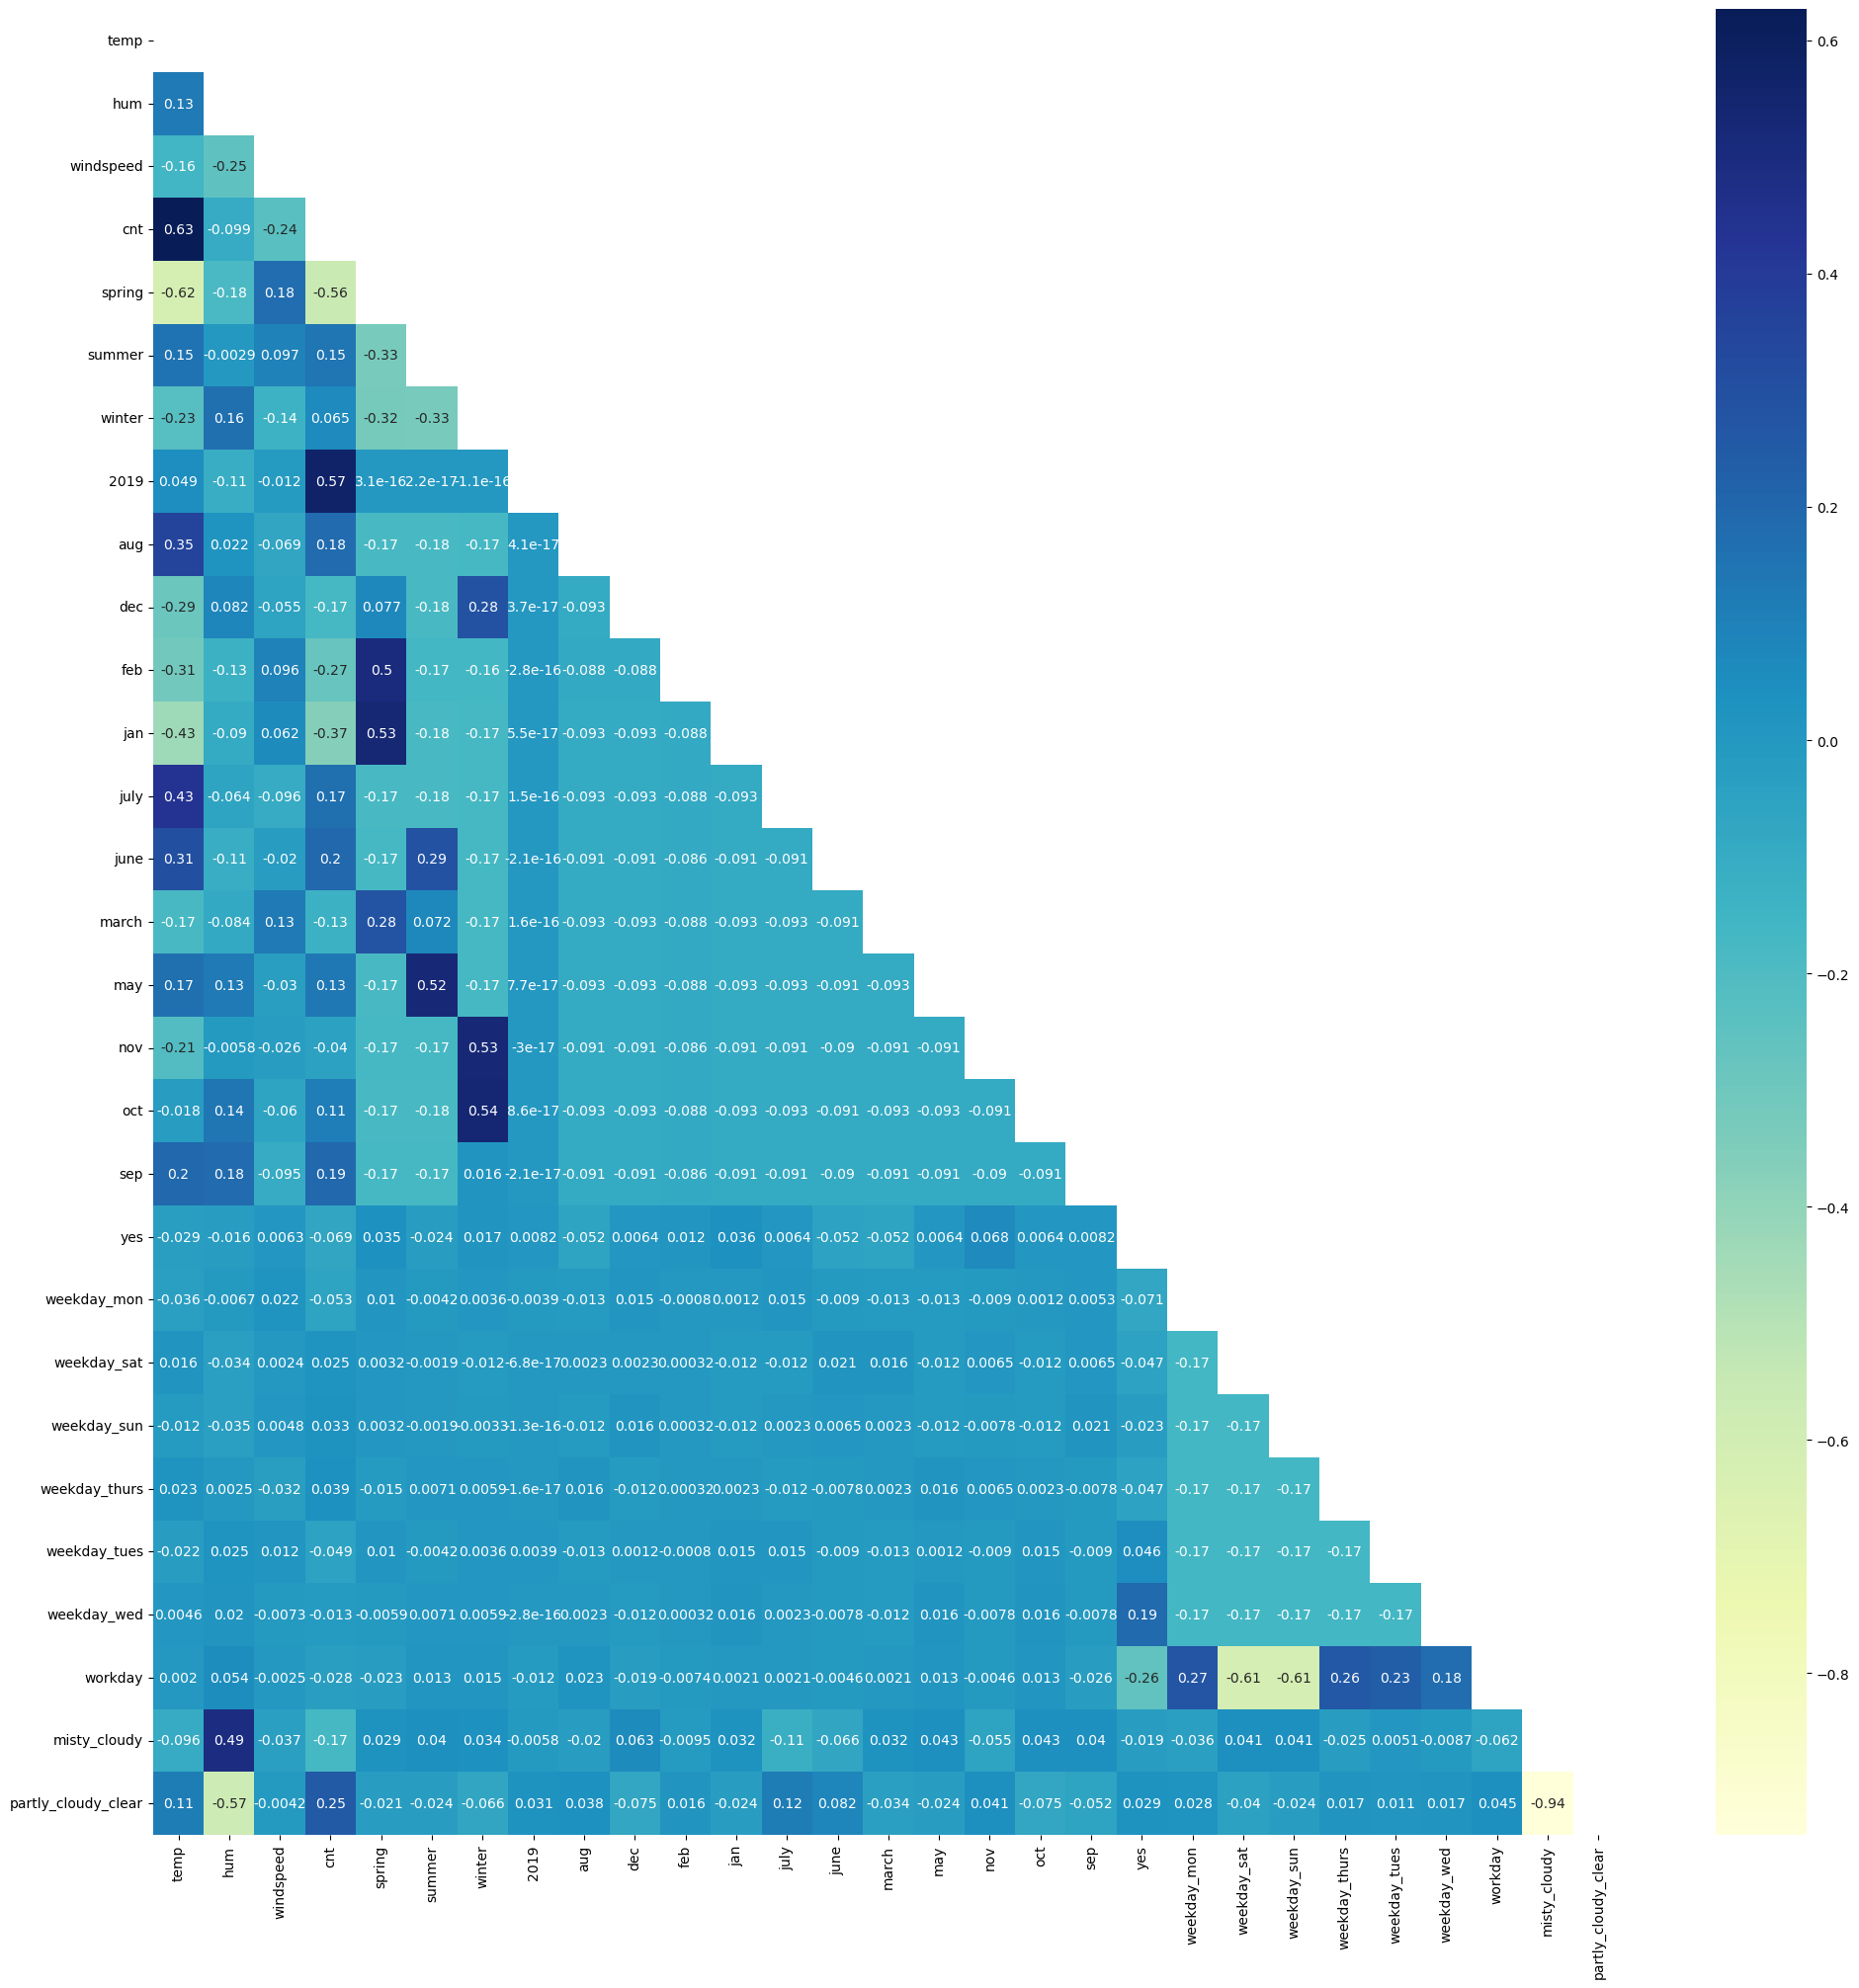

In [213]:
plt.figure(figsize = (24,24))
sns.heatmap(bikedf.corr(), cmap="YlGnBu", annot = True, mask=mask)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Positive correlation between target variable (cnt) and july(0.17), aug(0.18), sep (0.19), june(0.2), partly_cloudy_clear (0.25), 2019 (0.57), temp (0.63).
 - Negative correlation between target variable (cnt) and dec(-0.17), misty_cloudy(-0.17), windspeed(-0.24), feb(-0.27), jan(-0.37), spring(-0.56).

</div>

## Splitting the Data into Training and Testing Sets

In [216]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bikedf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [217]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [218]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [219]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

# Fit() learns min and max for the variable
# Transform() performs the scaling using min and max
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

temp  hum  windspeed  cnt  spring  summer  winter  2019  aug  dec  feb  \
653  0.51 0.58       0.30 0.86       0       0       1     1    0    0    0   
576  0.82 0.73       0.26 0.83       0       0       0     1    0    0    0   
426  0.44 0.64       0.26 0.47       1       0       0     1    0    0    0   
728  0.25 0.50       0.66 0.20       1       0       0     1    0    1    0   
482  0.40 0.50       0.19 0.48       0       1       0     1    0    0    0   

     jan  july  june  march  may  nov  oct  sep  yes  weekday_mon  \
653    0     0     0      0    0    0    1    0    0            0   
576    0     1     0      0    0    0    0    0    0            0   
426    0     0     0      1    0    0    0    0    0            0   
728    0     0     0      0    0    0    0    0    0            1   
482    0     0     0      0    0    0    0    0    0            0   

     weekday_sat  weekday_sun  weekday_thurs  weekday_tues  weekday_wed  \
653            0            0              0             0            1   
576            0            0              0             0            1   
426            0            1              0             0            0   
728            0            0              0             0            0   
482            0            1              0             0            0   

     workday  misty_cloudy  partly_cloudy_clear  
653        1             0                    1  
576        1             0                    1  
426        0             1                    0  
728        1             0                    1  
482        0             1                    0

In [220]:
df_train[num_vars].describe()

temp    hum  windspeed    cnt
count 510.00 510.00     510.00 510.00
mean    0.54   0.65       0.32   0.51
std     0.23   0.15       0.17   0.22
min     0.00   0.00       0.00   0.00
25%     0.34   0.54       0.20   0.36
50%     0.54   0.65       0.30   0.52
75%     0.74   0.75       0.41   0.68
max     1.00   1.00       1.00   1.00

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The min and max value for all the numeric variables has been converted to 0 and 1 with the scalar function.

</div>

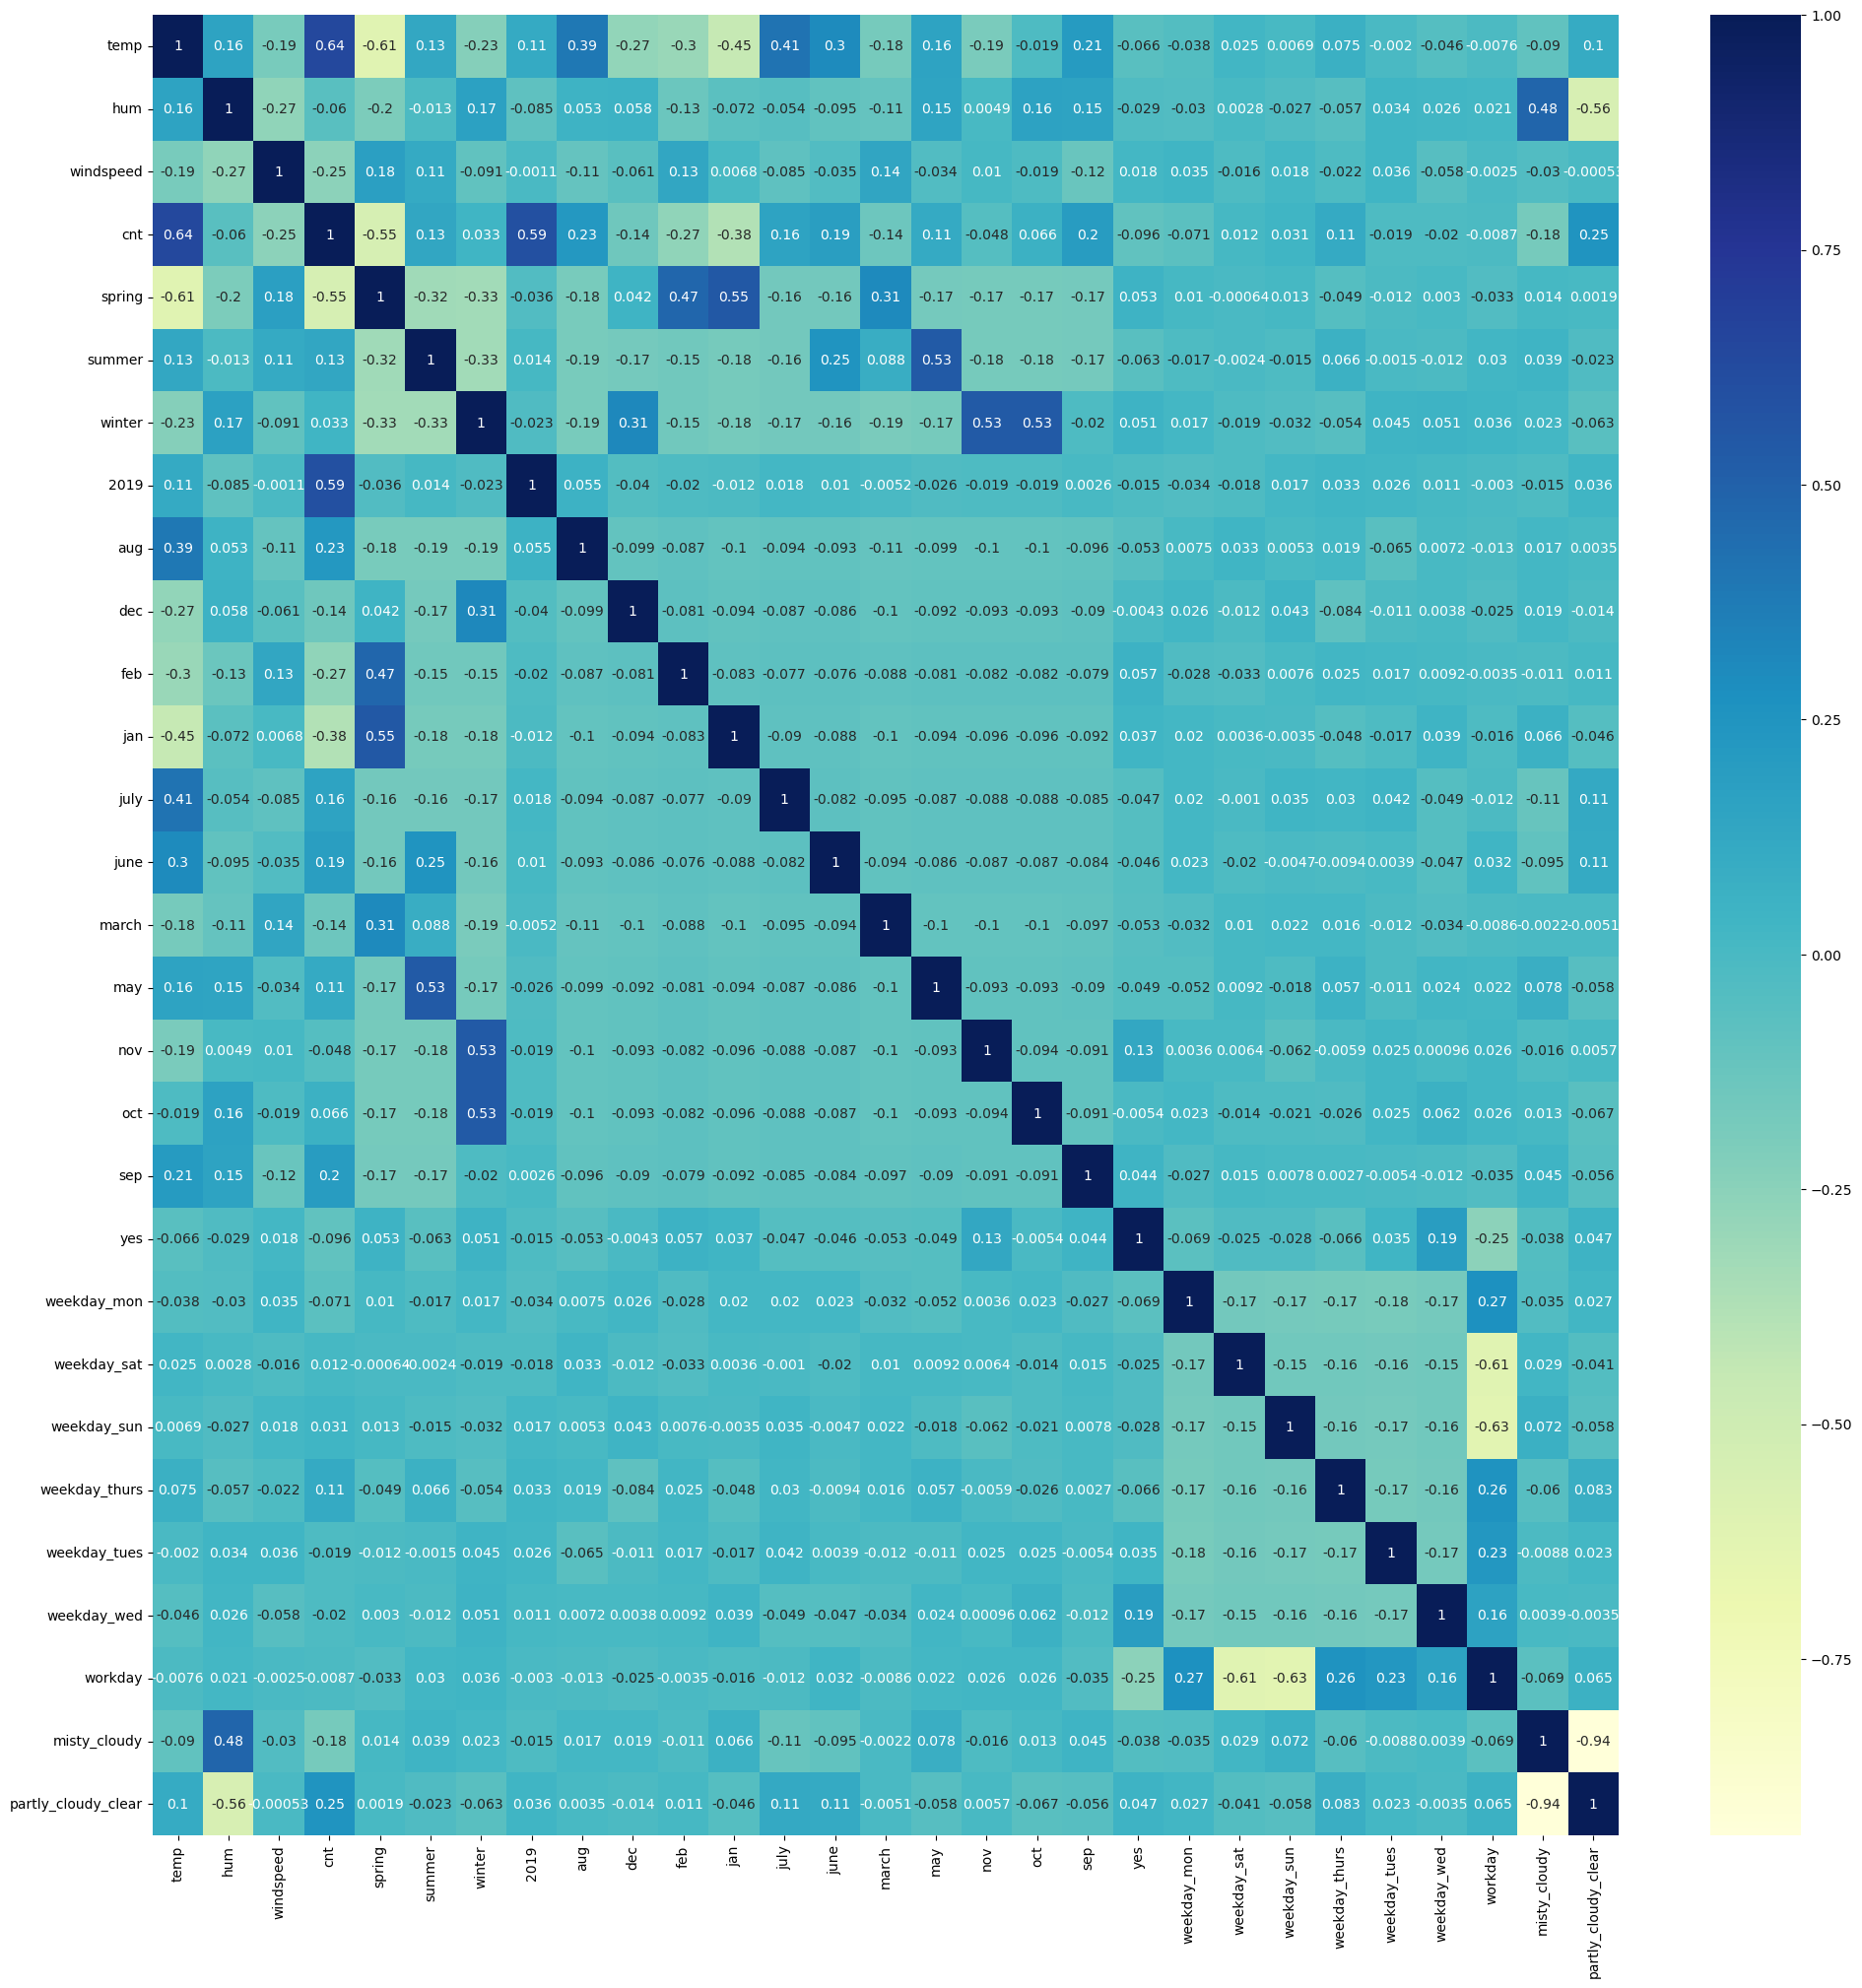

In [222]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 24))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The correlations observed before scaling are also valid after scaling with minor changes.
 - Positive correlation between target variable (cnt) and july(0.16), june (0.19), sep(0.20), aug(0.23), partly_cloudy_clear (0.25), 2019 (0.59), temp (0.64).
 - Negative correlation between target variable (cnt) and dec(-0.14), misty_cloudy(-0.18), windspeed(-0.25), feb(-0.27), jan(-0.38), spring(-0.55).

</div>

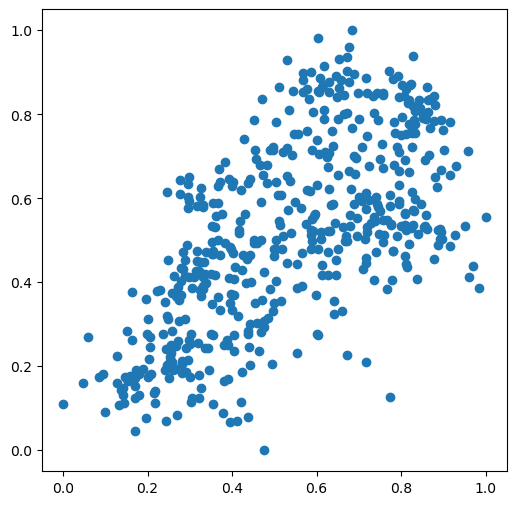

In [224]:
# Plotting a scatter plot of target variable with temp variable as its showing its strongest positive correlation with temp
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

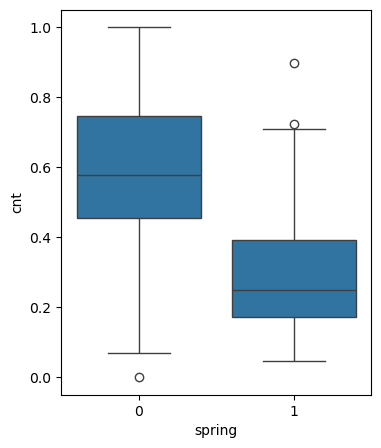

In [225]:
# Plotting a box plot of target variable with spring variable as its showing its strongest negative correlation with spring
plt.figure(figsize=[4,5])
sns.boxplot(y='cnt',x="spring",data= df_train)
plt.show()

### Dividing into X and Y sets for the model building

In [227]:
y_train = df_train.pop('cnt')
X_train = df_train

In [228]:
y_train

653   0.86
576   0.83
426   0.47
728   0.20
482   0.48
      ... 
526   0.76
578   0.83
53    0.22
350   0.31
79    0.24
Name: cnt, Length: 510, dtype: float64

In [229]:
X_train.head()

temp  hum  windspeed  spring  summer  winter  2019  aug  dec  feb  jan  \
653  0.51 0.58       0.30       0       0       1     1    0    0    0    0   
576  0.82 0.73       0.26       0       0       0     1    0    0    0    0   
426  0.44 0.64       0.26       1       0       0     1    0    0    0    0   
728  0.25 0.50       0.66       1       0       0     1    0    1    0    0   
482  0.40 0.50       0.19       0       1       0     1    0    0    0    0   

     july  june  march  may  nov  oct  sep  yes  weekday_mon  weekday_sat  \
653     0     0      0    0    0    1    0    0            0            0   
576     1     0      0    0    0    0    0    0            0            0   
426     0     0      1    0    0    0    0    0            0            0   
728     0     0      0    0    0    0    0    0            1            0   
482     0     0      0    0    0    0    0    0            0            0   

     weekday_sun  weekday_thurs  weekday_tues  weekday_wed  workday  \
653            0              0             0            1        1   
576            0              0             0            1        1   
426            1              0             0            0        0   
728            0              0             0            0        1   
482            1              0             0            0        0   

     misty_cloudy  partly_cloudy_clear  
653             0                    1  
576             0                    1  
426             1                    0  
728             0                    1  
482             1                    0

## Building a linear model 
#### (using the **LinearRegression function from SciKit Learn** for its compatibility with RFE) 

In [231]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [232]:
# Running RFE with the output number of the variables equal to 28
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [233]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('aug', False, 4),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 8),
 ('march', False, 9),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1),
 ('yes', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thurs', False, 7),
 ('weekday_tues', False, 2),
 ('weekday_wed', False, 5),
 ('workday', True, 1),
 ('misty_cloudy', True, 1),
 ('partly_cloudy_clear', True, 1)]

In [234]:
# Ranking wise order of the features
names = bikedf.columns
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'aug'), (1, 'cnt'), (1, 'dec'), (1, 'feb'), (1, 'hum'), (1, 'jan'), (1, 'march'), (1, 'may'), (1, 'misty_cloudy'), (1, 'oct'), (1, 'sep'), (1, 'spring'), (1, 'summer'), (1, 'temp'), (1, 'weekday_mon'), (1, 'weekday_sat'), (1, 'weekday_wed'), (1, 'windspeed'), (1, 'winter'), (1, 'workday'), (2, 'weekday_thurs'), (3, 'yes'), (4, '2019'), (5, 'weekday_tues'), (6, 'nov'), (7, 'weekday_sun'), (8, 'july'), (9, 'june')]


In [235]:
# Features supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', '2019', 'dec',
       'feb', 'jan', 'july', 'may', 'nov', 'sep', 'yes', 'weekday_sat',
       'weekday_sun', 'workday', 'misty_cloudy', 'partly_cloudy_clear'],
      dtype='object')

In [236]:
# Features not supported by RFE
X_train.columns[~rfe.support_]

Index(['aug', 'june', 'march', 'oct', 'weekday_mon', 'weekday_thurs',
       'weekday_tues', 'weekday_wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [238]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [239]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [240]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [241]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          9.48e-186
Time:                        18:17:02   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1437    

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - R-squared: 0.849
 - Adj. R-squared: 0.842
 - non-significant p-values: weekday_sun, weekday_sat, workday, may, summer, yes.

</div>

In [243]:
# Dropping 'weekday_sun' as it has a high p-value of 0.624
X_train_new = X_train_rfe.drop(["weekday_sun"], axis = 1)

### Building Model 2 

In [245]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [246]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [247]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.4
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          8.77e-187
Time:                        18:17:02   Log-Likelihood:                 519.63
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     490   BIC:                            -914.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1088    

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - R-squared: 0.848
 - Adj. R-squared: 0.843
 - non-significant p-values: weekday_sat, may, summer, feb, workday.

</div>

In [249]:
# Dropping 'weekday_sat' as it has a high p-value of 0.647
X_train_new = X_train_new.drop(['weekday_sat'], axis=1)

In [250]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 152.37
18  partly_cloudy_clear  10.40
17         misty_cloudy   8.96
4                spring   5.79
1                  temp   4.88
6                winter   3.87
5                summer   3.49
10                  jan   2.38
2                   hum   1.97
9                   feb   1.87
13                  nov   1.81
8                   dec   1.66
12                  may   1.52
11                 july   1.49
14                  sep   1.34
3             windspeed   1.22
15                  yes   1.11
16              workday   1.09
7                  2019   1.04

### Building Model 3 

In [252]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_3 = sm.add_constant(X_train_new)

In [253]:
lm = sm.OLS(y_train,X_train_3).fit()   # Running the linear model

In [254]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          7.76e-188
Time:                        18:17:03   Log-Likelihood:                 519.52
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1050    

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - R-squared: 0.848
 - Adj. R-squared: 0.843
 - non-significant p-values: may, summer, feb, workday.

</div>

In [256]:
# Dropping 'may' as it has a high p-value of 0.160
X_train_new = X_train_new.drop(['may'], axis=1)

In [257]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 146.96
17  partly_cloudy_clear  10.37
16         misty_cloudy   8.93
4                spring   5.69
1                  temp   4.73
6                winter   3.84
5                summer   2.81
10                  jan   2.37
2                   hum   1.94
9                   feb   1.86
12                  nov   1.80
8                   dec   1.65
11                 july   1.49
13                  sep   1.34
3             windspeed   1.22
14                  yes   1.11
15              workday   1.09
7                  2019   1.04

### Building Model 4

In [259]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_4 = sm.add_constant(X_train_new)

In [260]:
lm = sm.OLS(y_train,X_train_4).fit()   # Running the linear model

In [261]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          1.60e-188
Time:                        18:17:03   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0921    

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - R-squared: 0.848
 - Adj. R-squared: 0.843
 - non-significant p-values: feb, workday, nov, spring.
 - Even the const has a high p-value of 0.055 comparitively.

</div>

In [263]:
# Dropping 'feb' as it has a high p-value of 0.103
X_train_new = X_train_new.drop(['feb'], axis=1)

In [264]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 144.56
16  partly_cloudy_clear  10.36
15         misty_cloudy   8.93
4                spring   5.27
1                  temp   4.43
6                winter   3.83
5                summer   2.76
2                   hum   1.94
11                  nov   1.76
9                   jan   1.68
8                   dec   1.50
10                 july   1.49
12                  sep   1.34
3             windspeed   1.21
13                  yes   1.11
14              workday   1.09
7                  2019   1.04

### Building Model 5

In [266]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_5 = sm.add_constant(X_train_new)

In [267]:
lm = sm.OLS(y_train,X_train_5).fit()   # Running the linear model

In [268]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          4.55e-189
Time:                        18:17:03   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0821    

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - R-squared: 0.847
 - Adj. R-squared: 0.842
 - non-significant p-values: const, workday, nov, dec.

</div>

In [270]:
# Dropping 'workday' as it has a high p-value of 0.031
X_train_new = X_train_new.drop(['workday'], axis=1)

In [271]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 143.19
15  partly_cloudy_clear  10.34
14         misty_cloudy   8.93
4                spring   5.27
1                  temp   4.42
6                winter   3.83
5                summer   2.76
2                   hum   1.93
11                  nov   1.76
9                   jan   1.68
8                   dec   1.49
10                 july   1.49
12                  sep   1.34
3             windspeed   1.21
7                  2019   1.04
13                  yes   1.03

### Building Model 6

In [273]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_6 = sm.add_constant(X_train_new)

In [274]:
lm = sm.OLS(y_train,X_train_6).fit()   # Running the linear model

In [275]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          3.34e-189
Time:                        18:17:03   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0721    

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - R-squared: 0.845
 - Adj. R-squared: 0.841
 - non-significant p-values: const, dec, nov, jan.

</div>

In [277]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'dec', 'jan', 'july', 'nov', 'sep', 'yes', 'misty_cloudy',
       'partly_cloudy_clear'],
      dtype='object')

In [278]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [279]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                   hum 26.36
0                  temp 25.12
14  partly_cloudy_clear 15.69
13         misty_cloudy  9.25
3                spring  5.75
2             windspeed  4.67
5                winter  4.54
4                summer  3.28
6                  2019  2.10
10                  nov  1.89
8                   jan  1.81
7                   dec  1.61
9                  july  1.60
11                  sep  1.43
12                  yes  1.06

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [281]:
y_train_pred = lm.predict(X_train_6)

Text(0.5, 0, 'Errors')

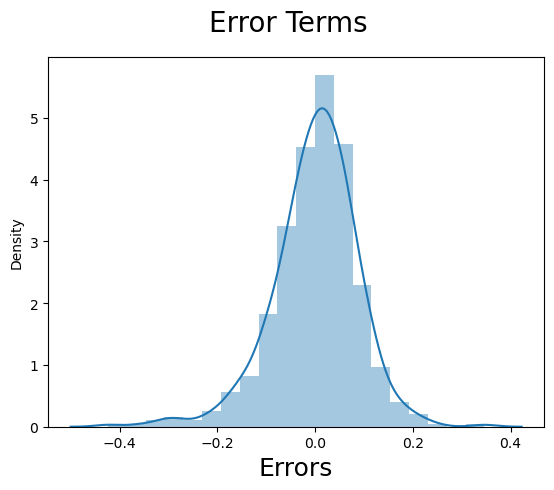

In [282]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [285]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [287]:
y_test = df_test.pop('cnt')
X_test = df_test

In [288]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [289]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [290]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_pred)

0.8216461699732149

## Model Evaluation

Text(0, 0.5, 'y_pred')

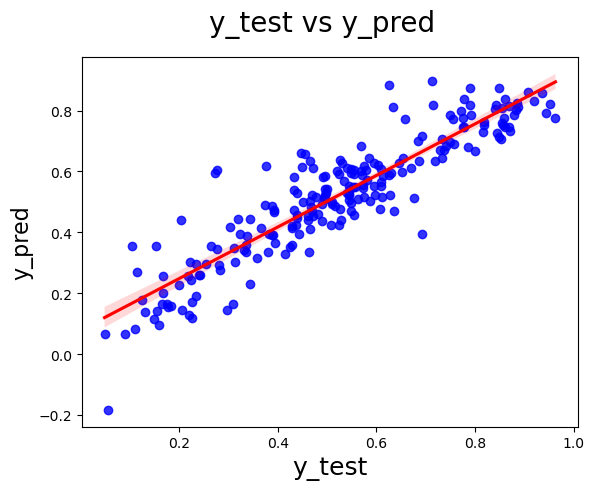

In [293]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
#plt.scatter(y_test,y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

<div class="alert alert-block alert-info">
<b>Insight</b>

 - We can see a strong positive linear relationship between the predicted values of y (y_pred) and the actual values of y from the test dataset (y_test).
 - This means our linear regression model is performing well and is capable of making accurate predictions on the test data.
</div>

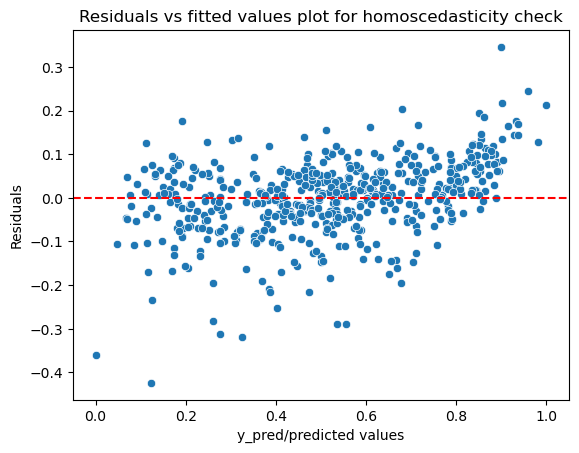

In [295]:
residuals = y_train-y_train_pred
p = sns.scatterplot(x=y_train,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.axhline(0,color='red',linestyle = '--')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

<div class="alert alert-block alert-info">
<b>Insight</b>

 - The residuals are scattered evenly around the horizontal line at zero, indicating a constant variance.
 - As the residuals or error terms have a constant variance across all levels of the independent variables this indicates that the model is homoscedastic.

</div>

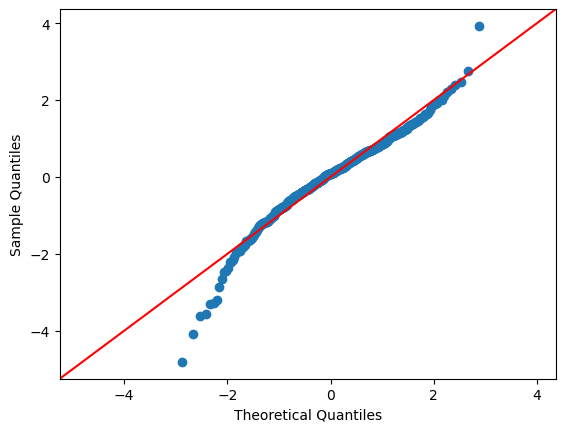

In [301]:
# plotting the QQ plot
sm.qqplot(residuals,  line='45', fit=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>

 - The QQ Plot is used for determining if a dataset is normally distributed. 
 - The above QQ Plot indicates that the dataset is reasonably normally distributed with a few outliers, as shown by the points deviating from the red line.

</div>